In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
plt.rcParams.update({'font.size': 16})


In [13]:
epsilons = [0.1, 0.2, 0.5, 0.8, 1]
# number of citizens at citizen_density = 0.7
num_samples = 1120

# Create an empty DataFrame with columns for each epsilon
df = pd.DataFrame(columns=epsilons)

# Fill the DataFrame with random Gaussian values for each epsilon
for epsilon in epsilons:
    random_gauss = [rd.gauss(mu=0, sigma=epsilon) for _ in range(num_samples)]
    df[epsilon] = random_gauss

# Show the first few rows of the DataFrame
print(df.head())

        0.1       0.2       0.5       0.8       1.0
0 -0.037410  0.227949 -0.381368 -0.029689 -0.303228
1  0.035850  0.504097 -0.470539  0.548756  1.597420
2 -0.278567 -0.160927  0.289232 -0.835998  0.694446
3 -0.002691 -0.207388 -0.618787  0.184047  0.424316
4  0.107816 -0.118631  0.294137 -0.751510  0.984901


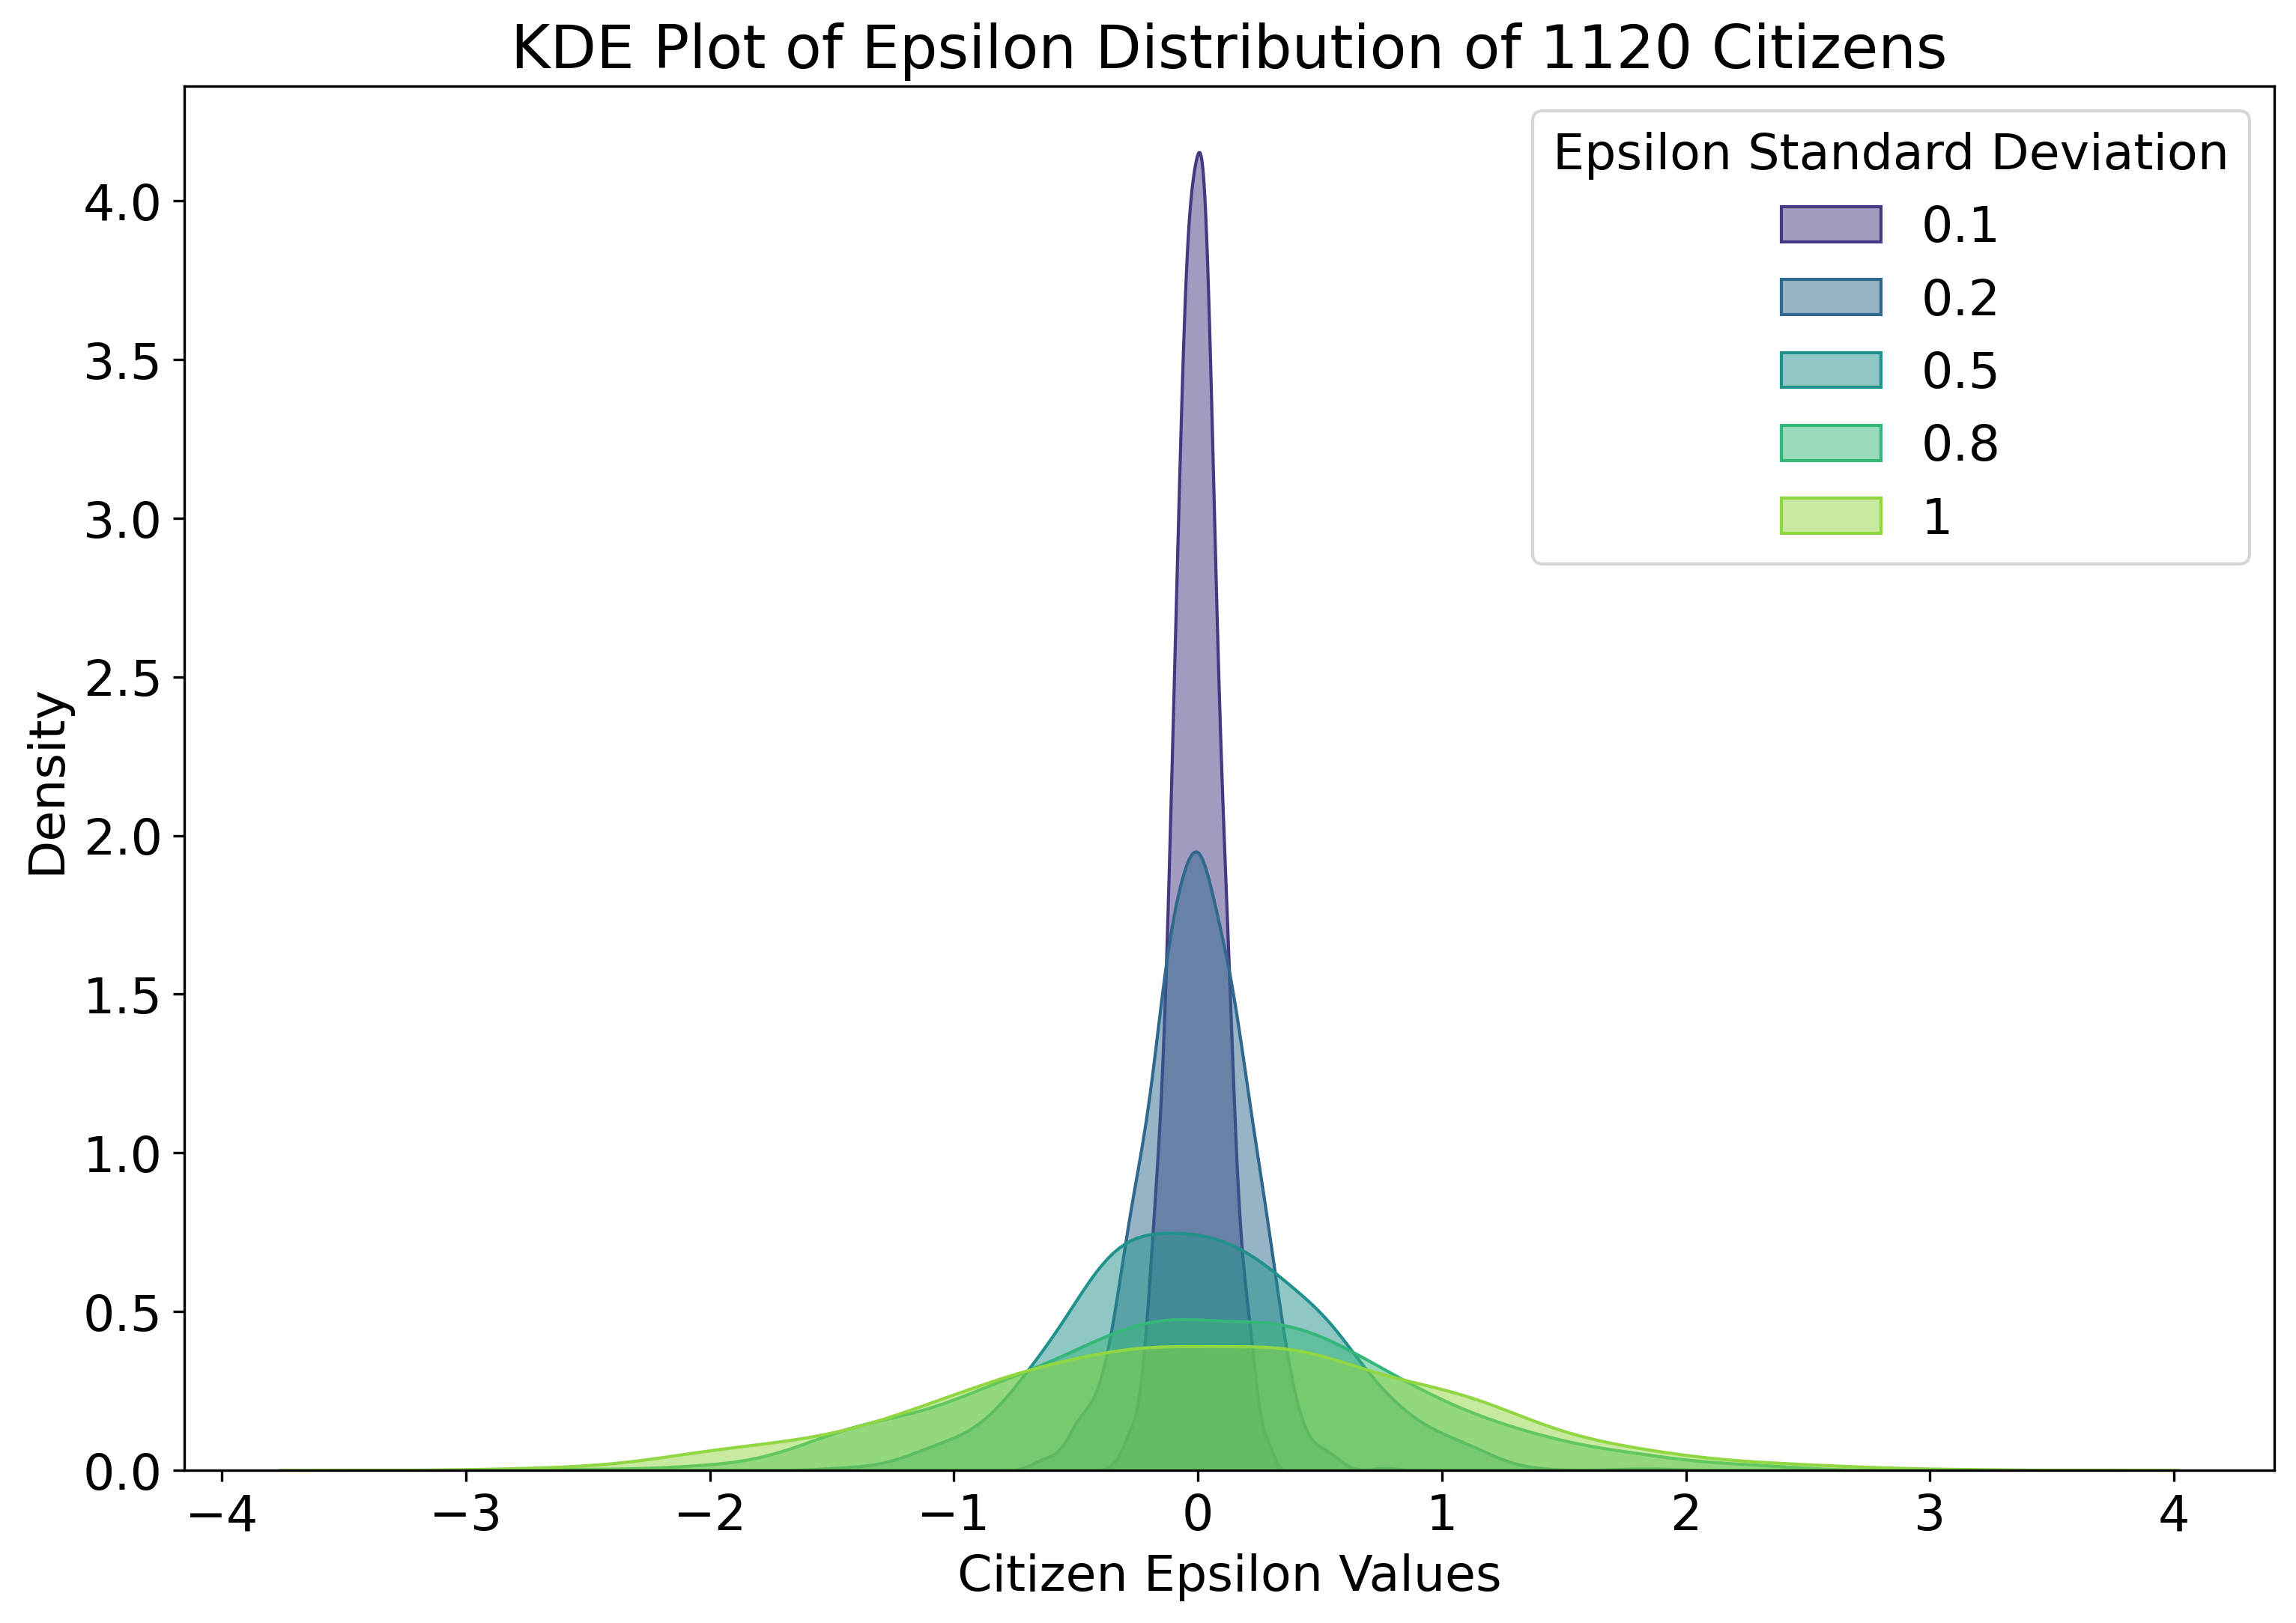

In [14]:
# Set the figure size and DPI
plt.figure(figsize=(12, 8), dpi=300)


# Define a single color palette
color_palette = sns.color_palette("viridis", len(epsilons))

# Plot the distributions of each epsilon as a kernel density estimate in seaborn
# with each overlayed on the same plot
for idx, epsilon in enumerate(epsilons):
    sns.kdeplot(df[epsilon], label=epsilon, color=color_palette[idx], fill=True, alpha=0.5)

plt.title('KDE Plot of Epsilon Distribution of 1120 Citizens')
plt.xlabel('Citizen Epsilon Values')
plt.legend(title='Epsilon Standard Deviation')

# Save the high-resolution plot to a file
plt.savefig('kde_plot_epsilon_high_resolution.png', dpi=300)


In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

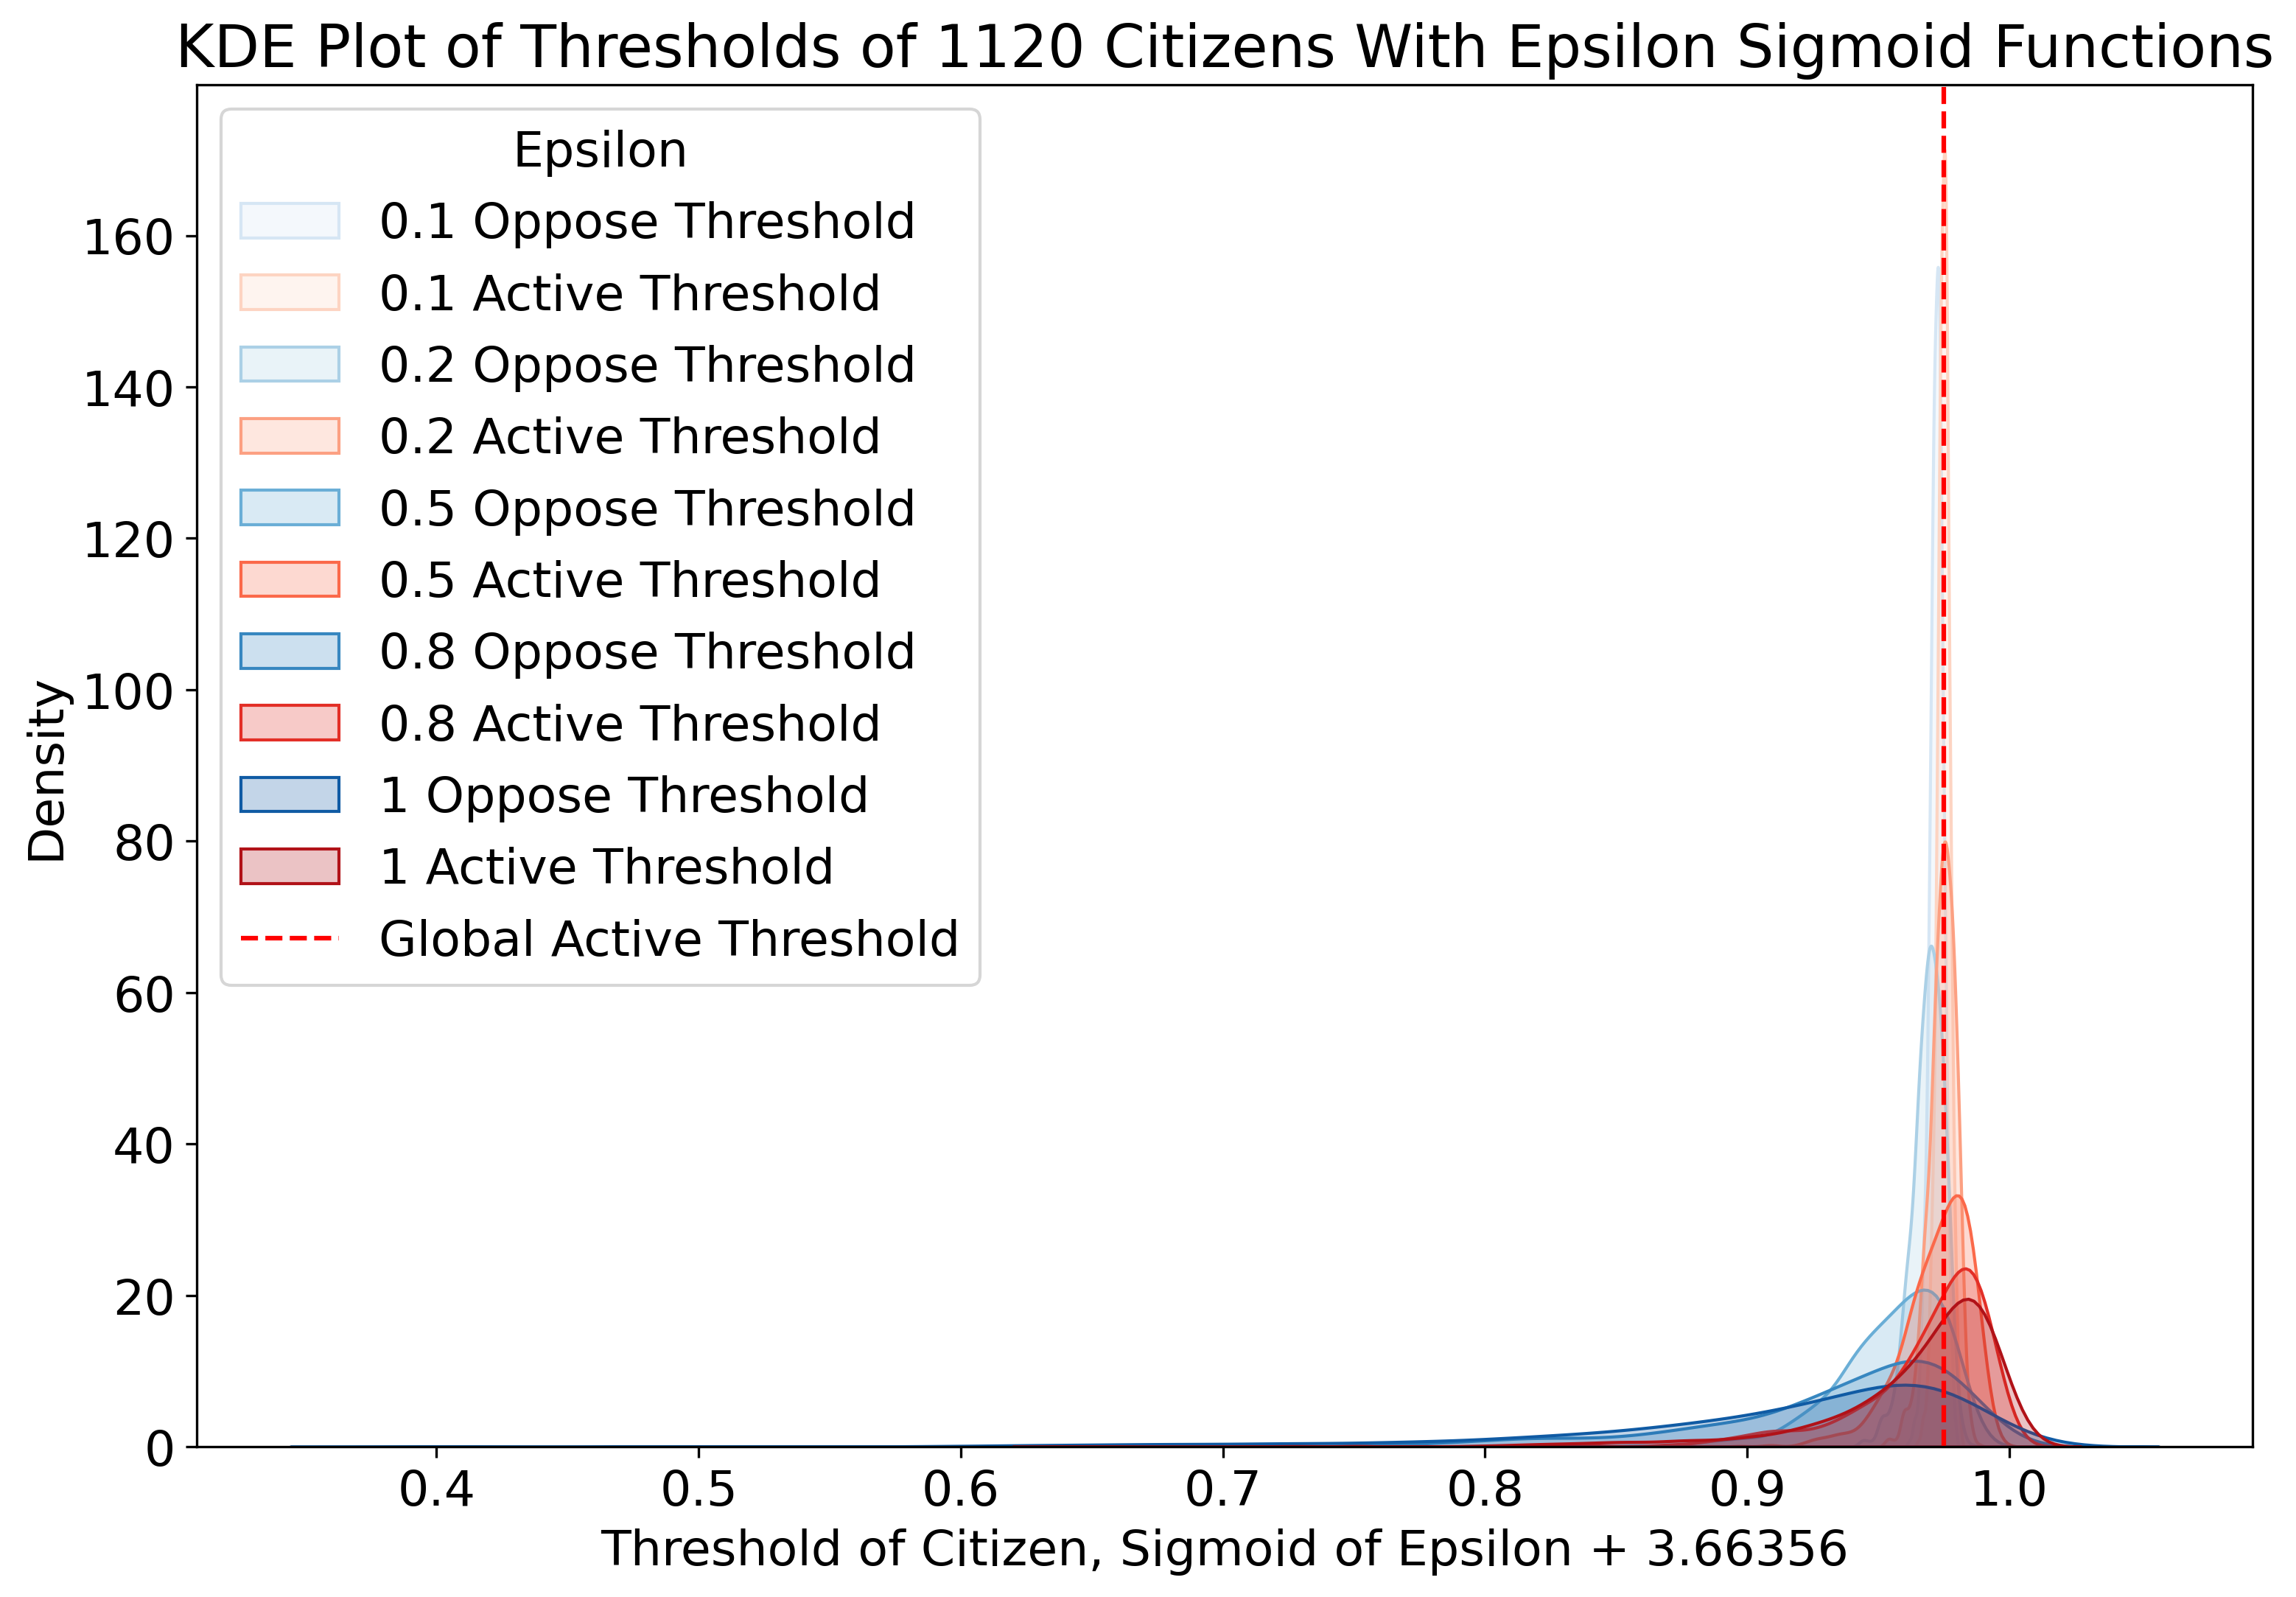

In [16]:
# Set the figure size and DPI
plt.figure(figsize=(12, 8), dpi=300)

# Generate color palettes for Oppose and Active Thresholds
oppose_colors = sns.color_palette("Blues", n_colors=len(epsilons))
active_colors = sns.color_palette("Reds", n_colors=len(epsilons))

# kde plot of thresholds for each epsilon sigmoid function + threshold constant
for idx, epsilon in enumerate(epsilons):
    sns.kdeplot(sigmoid(3.66356 - epsilon + df[epsilon]),
                label=f"{epsilon} Oppose Threshold",
                color=oppose_colors[idx],
                fill=True)
    sns.kdeplot(sigmoid(3.66356 + df[epsilon]),
                label=f"{epsilon} Active Threshold",
                color=active_colors[idx],
                fill=True)

plt.axvline(0.975, color='red', linestyle='--', label='Global Active Threshold')


plt.title('KDE Plot of Thresholds of 1120 Citizens With Epsilon Sigmoid Functions')
plt.xlabel('Threshold of Citizen, Sigmoid of Epsilon + 3.66356')
plt.legend(title='Epsilon')

# Save the high-resolution plot to a file
plt.savefig('kde_plot_thresholds_high_resolution.png', dpi=300)

# Show the plot
plt.show()


In [17]:
# Plot private preference distribution for each mean
private_preferences = [-1, -0.8, -0.5, -0.3, 0, 0.3, 0.5]

# number of citizens at citizen_density = 0.7
num_samples = 1120

# Create an empty DataFrame with columns for each epsilon
df_p = pd.DataFrame(columns=private_preferences)

# Fill the DataFrame with random Gaussian values for each epsilon
for preference in private_preferences:
    random_gauss = [rd.gauss(mu=(preference), sigma=1) for _ in range(num_samples)]
    df_p[preference] = random_gauss

# Show the first few rows of the DataFrame
print(df_p.head())

       -1.0      -0.8      -0.5      -0.3       0.0       0.3       0.5
0 -1.166827 -0.705111 -1.306937  0.466486  0.281980 -1.094857  1.016745
1 -1.509364 -1.340215 -0.671720 -0.822171 -0.238879  1.463599  0.627593
2  0.208698  0.066421 -0.875328 -0.237779 -1.246445  1.059321  1.792618
3 -0.676409 -0.345802  0.669685 -0.680420  0.112710  0.693047  0.748952
4 -0.880976  0.585173  0.074919  0.602239  2.016170 -0.286134 -0.263564


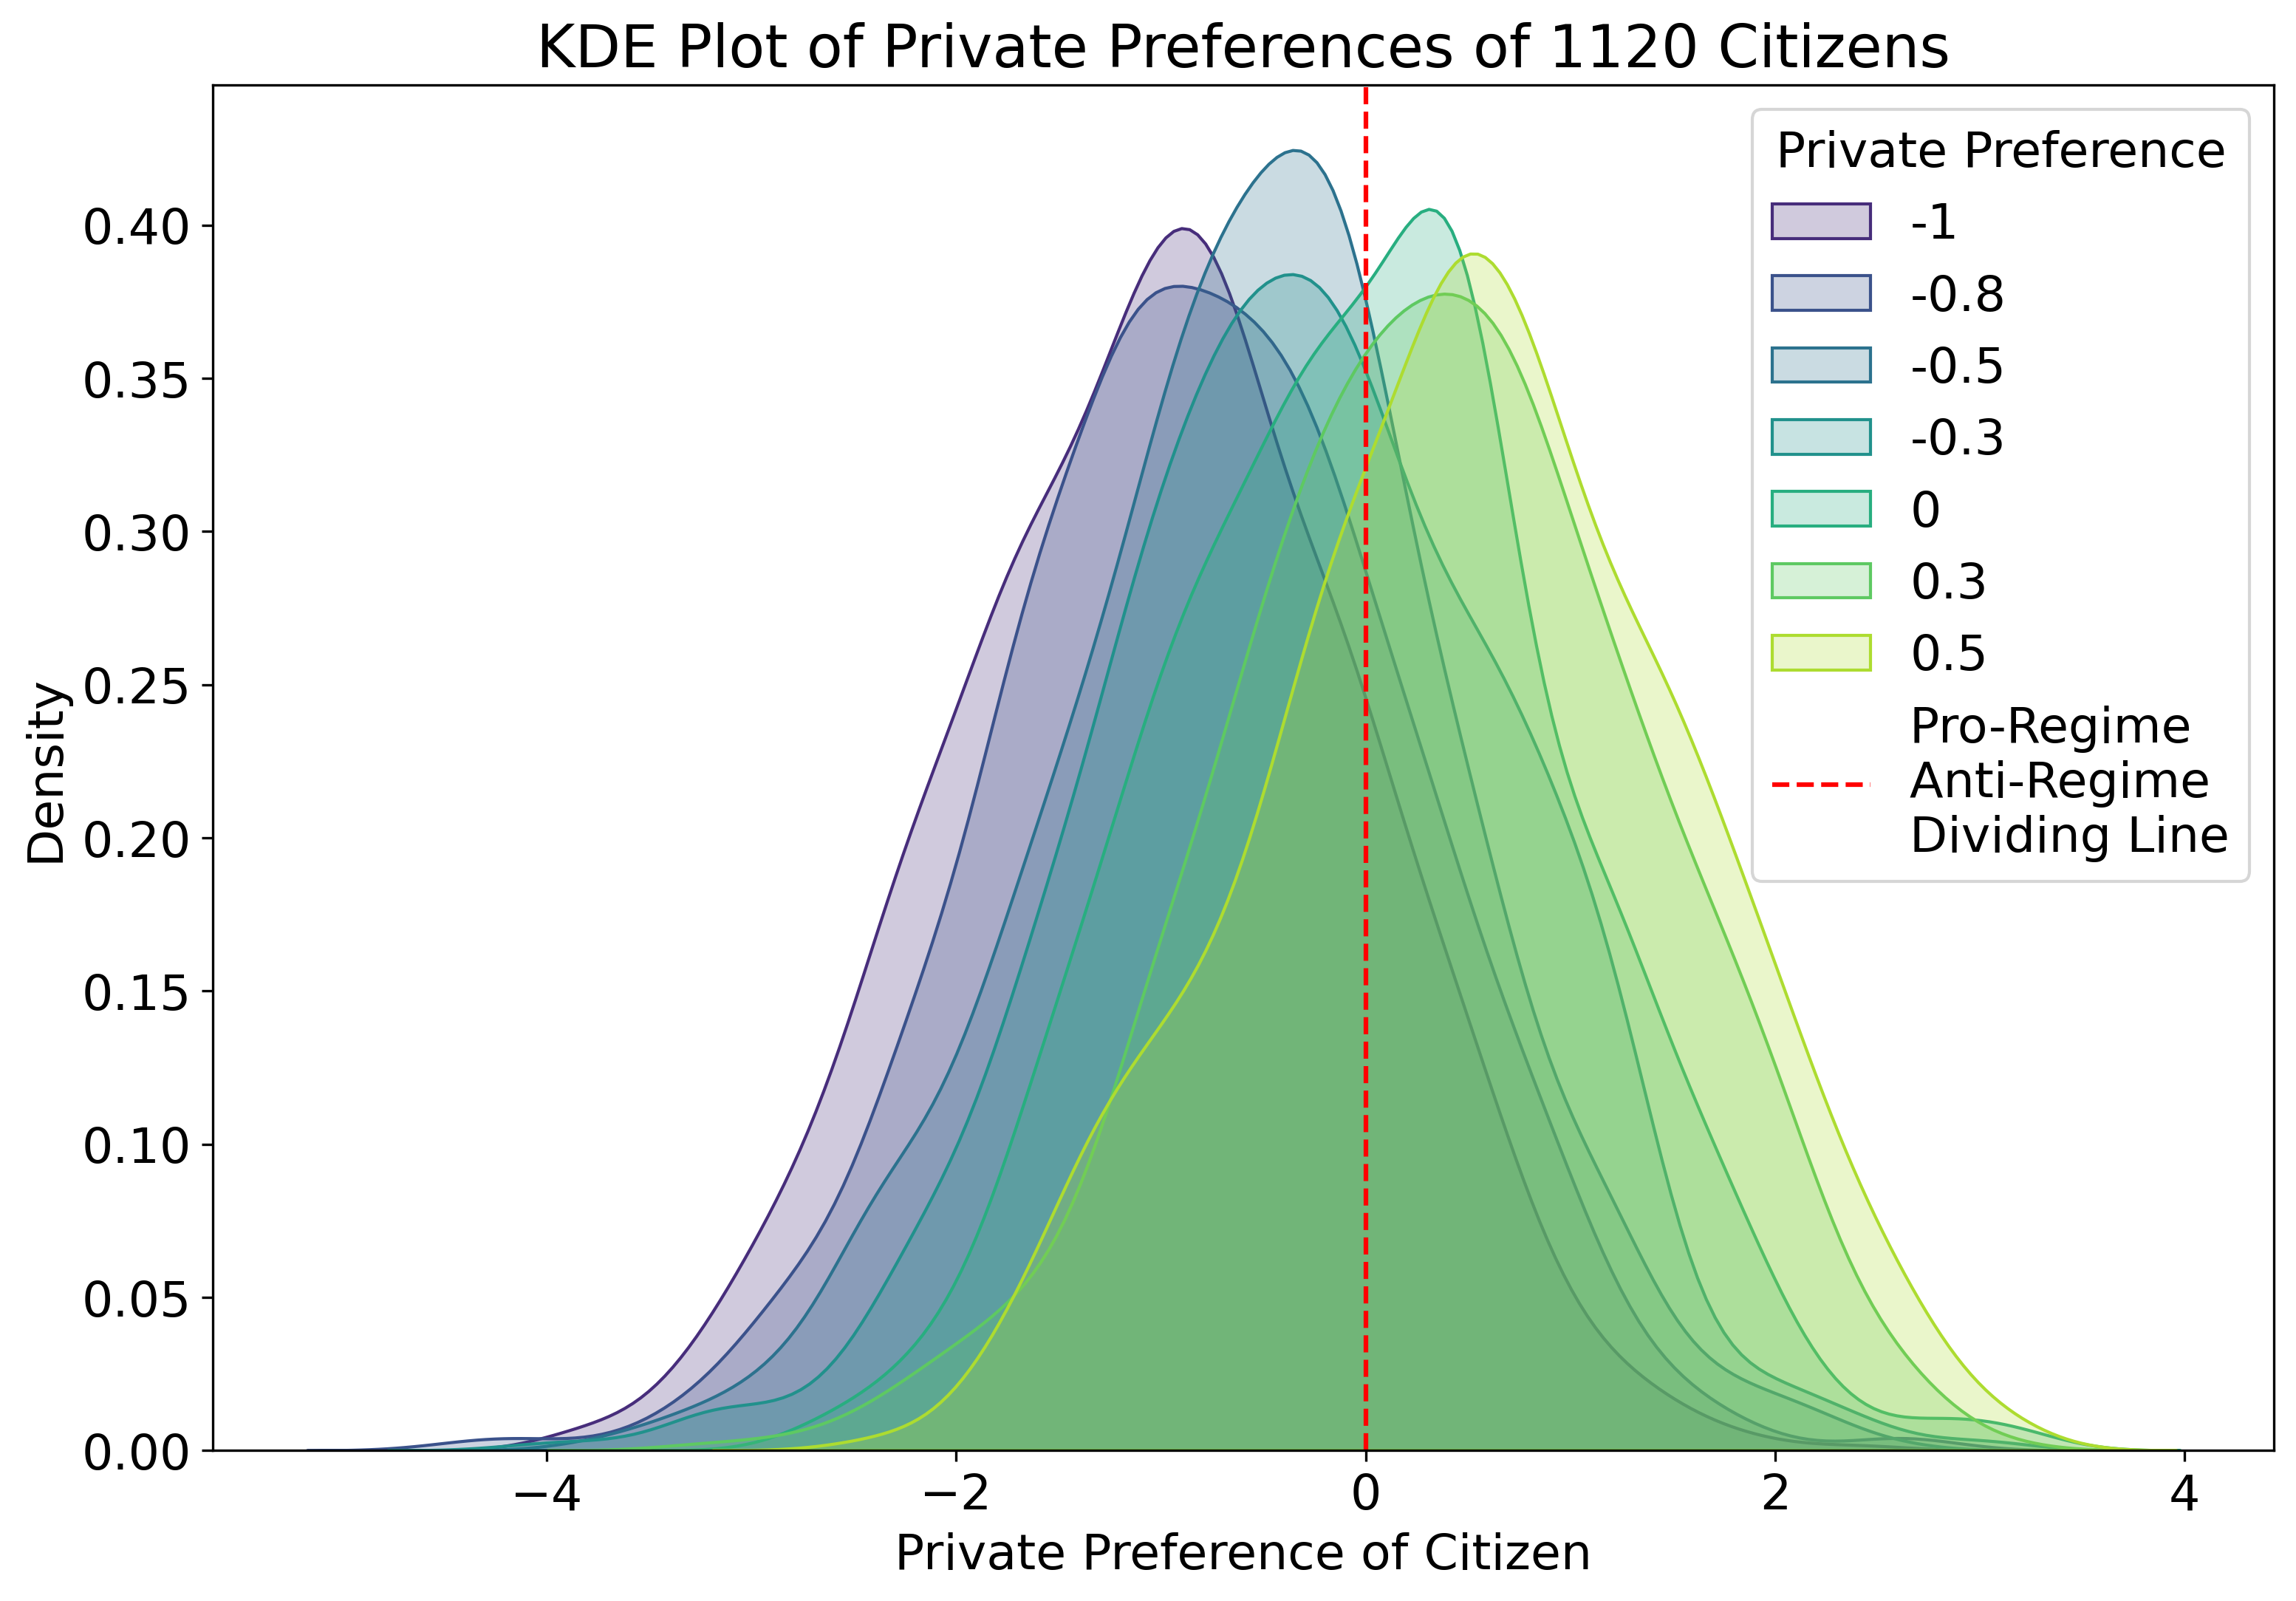

In [18]:
plt.figure(figsize=(12, 8), dpi=300)

# Define a single color palette
color_palette = sns.color_palette("viridis", len(private_preferences))

# Plot the distributions of each preference as a kernel density estimate in seaborn with fill
for idx, preference in enumerate(private_preferences):
    sns.kdeplot(df_p[preference], label=preference, color=color_palette[idx], fill=True)

# Draw a vertical red line at 0
plt.axvline(0, color='red', linestyle='--', label='Pro-Regime \nAnti-Regime \nDividing Line')

plt.title('KDE Plot of Private Preferences of 1120 Citizens')
plt.xlabel('Private Preference of Citizen')
plt.legend(title='Private Preference')

plt.savefig('kde_plot_private_preferences_high_resolution.png', dpi=300)

plt.show()


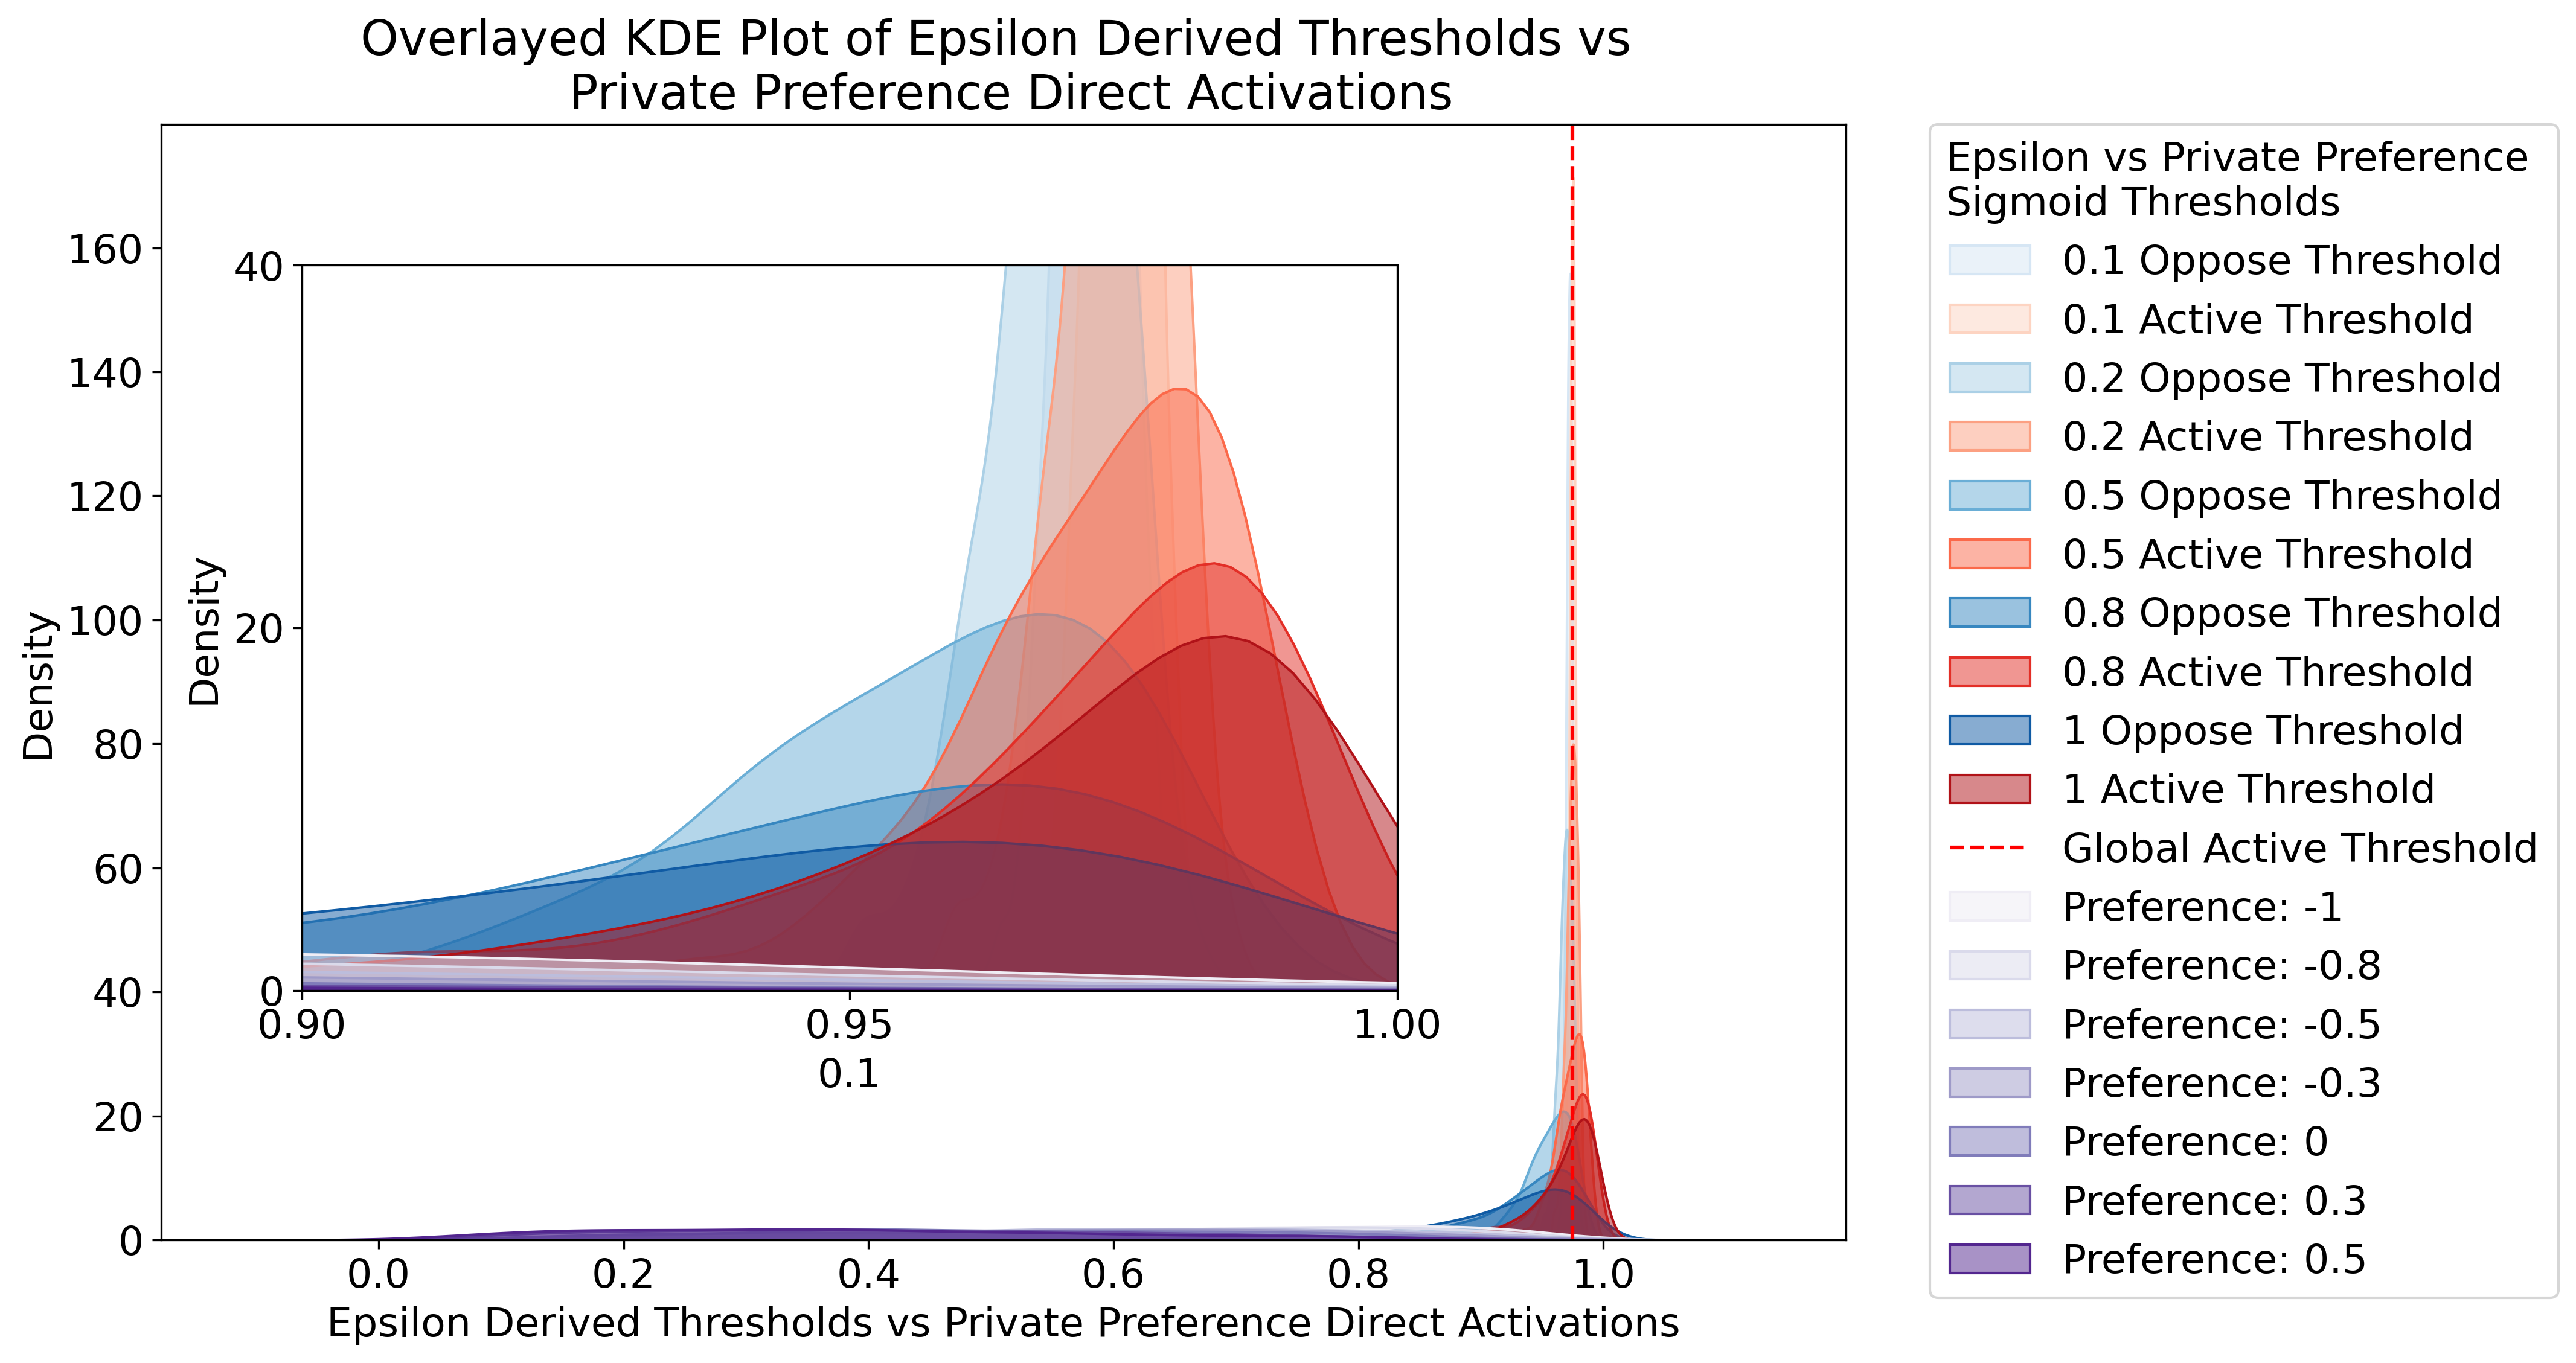

In [19]:


from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Set the figure size and DPI
plt.figure(figsize=(12, 8), dpi=300)

# Define color palettes for each category
oppose_palette = sns.color_palette("Blues", len(epsilons))
active_palette = sns.color_palette("Reds", len(epsilons))
preference_palette = sns.color_palette("Purples", len(private_preferences))

# kde plot of thresholds for each epsilon sigmoid function + threshold constant
# kde plot of thresholds for each epsilon sigmoid function + threshold constant
for idx, epsilon in enumerate(epsilons):
    sns.kdeplot(sigmoid(3.66356 - epsilon + df[epsilon]),
                label=f"{epsilon} Oppose Threshold",
                color=oppose_colors[idx],
                fill=True, alpha=0.5)
    sns.kdeplot(sigmoid(3.66356 + df[epsilon]),
                label=f"{epsilon} Active Threshold",
                color=active_colors[idx],
                fill=True, alpha=0.5)

plt.axvline(0.975, color='red', linestyle='--', label='Global Active Threshold')

# Plot the distributions of each preference as a kernel density estimate in seaborn
# with each overlayed on the same plot
for idx, preference in enumerate(private_preferences):
    sns.kdeplot(sigmoid(-1 * df_p[preference]), label=f"Preference: {preference}", color=preference_palette[idx], fill=True, alpha=0.5)

plt.title('Overlayed KDE Plot of Epsilon Derived Thresholds vs \n Private Preference Direct Activations')
plt.xlabel('Epsilon Derived Thresholds vs Private Preference Direct Activations')

# Move the legend outside of the plot
plt.legend(title='Epsilon vs Private Preference \nSigmoid Thresholds', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Create an inset of the graph from 0.9 to 1.0 x-axis and 0 to 40 y-axis
ax = plt.gca()
inset_ax = inset_axes(ax, width="65%", height="65%", loc="upper left", borderpad=3.5)
for idx, epsilon in enumerate(epsilons):
    sns.kdeplot(sigmoid(3.66356 - epsilon + df[epsilon]), label=f"{epsilon} Oppose Threshold", color=oppose_palette[idx], ax=inset_ax, fill=True, alpha=0.5)
    sns.kdeplot(sigmoid(3.66356 + df[epsilon]), label=f"{epsilon} Active Threshold", color=active_palette[idx], ax=inset_ax, fill=True, alpha=0.5)
for idx, preference in enumerate(private_preferences):
    sns.kdeplot(sigmoid(-1 * df_p[preference]), label=f"Preference: {preference}", color=preference_palette[idx], ax=inset_ax, fill=True, alpha=0.5)

inset_ax.set_xlim(0.9, 1.0)
inset_ax.set_ylim(0, 40)
inset_ax.set_xticks([0.9, 0.95, 1.0])
inset_ax.set_yticks([0, 20, 40])

# Save the high-resolution plot to a file
plt.savefig('kde_plot_pp_vs_threshold_overlay_high_resolution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [20]:
def jail_probability(epsilon):
    return (1 - np.exp(-2.3 * (2 * sigmoid(epsilon))))

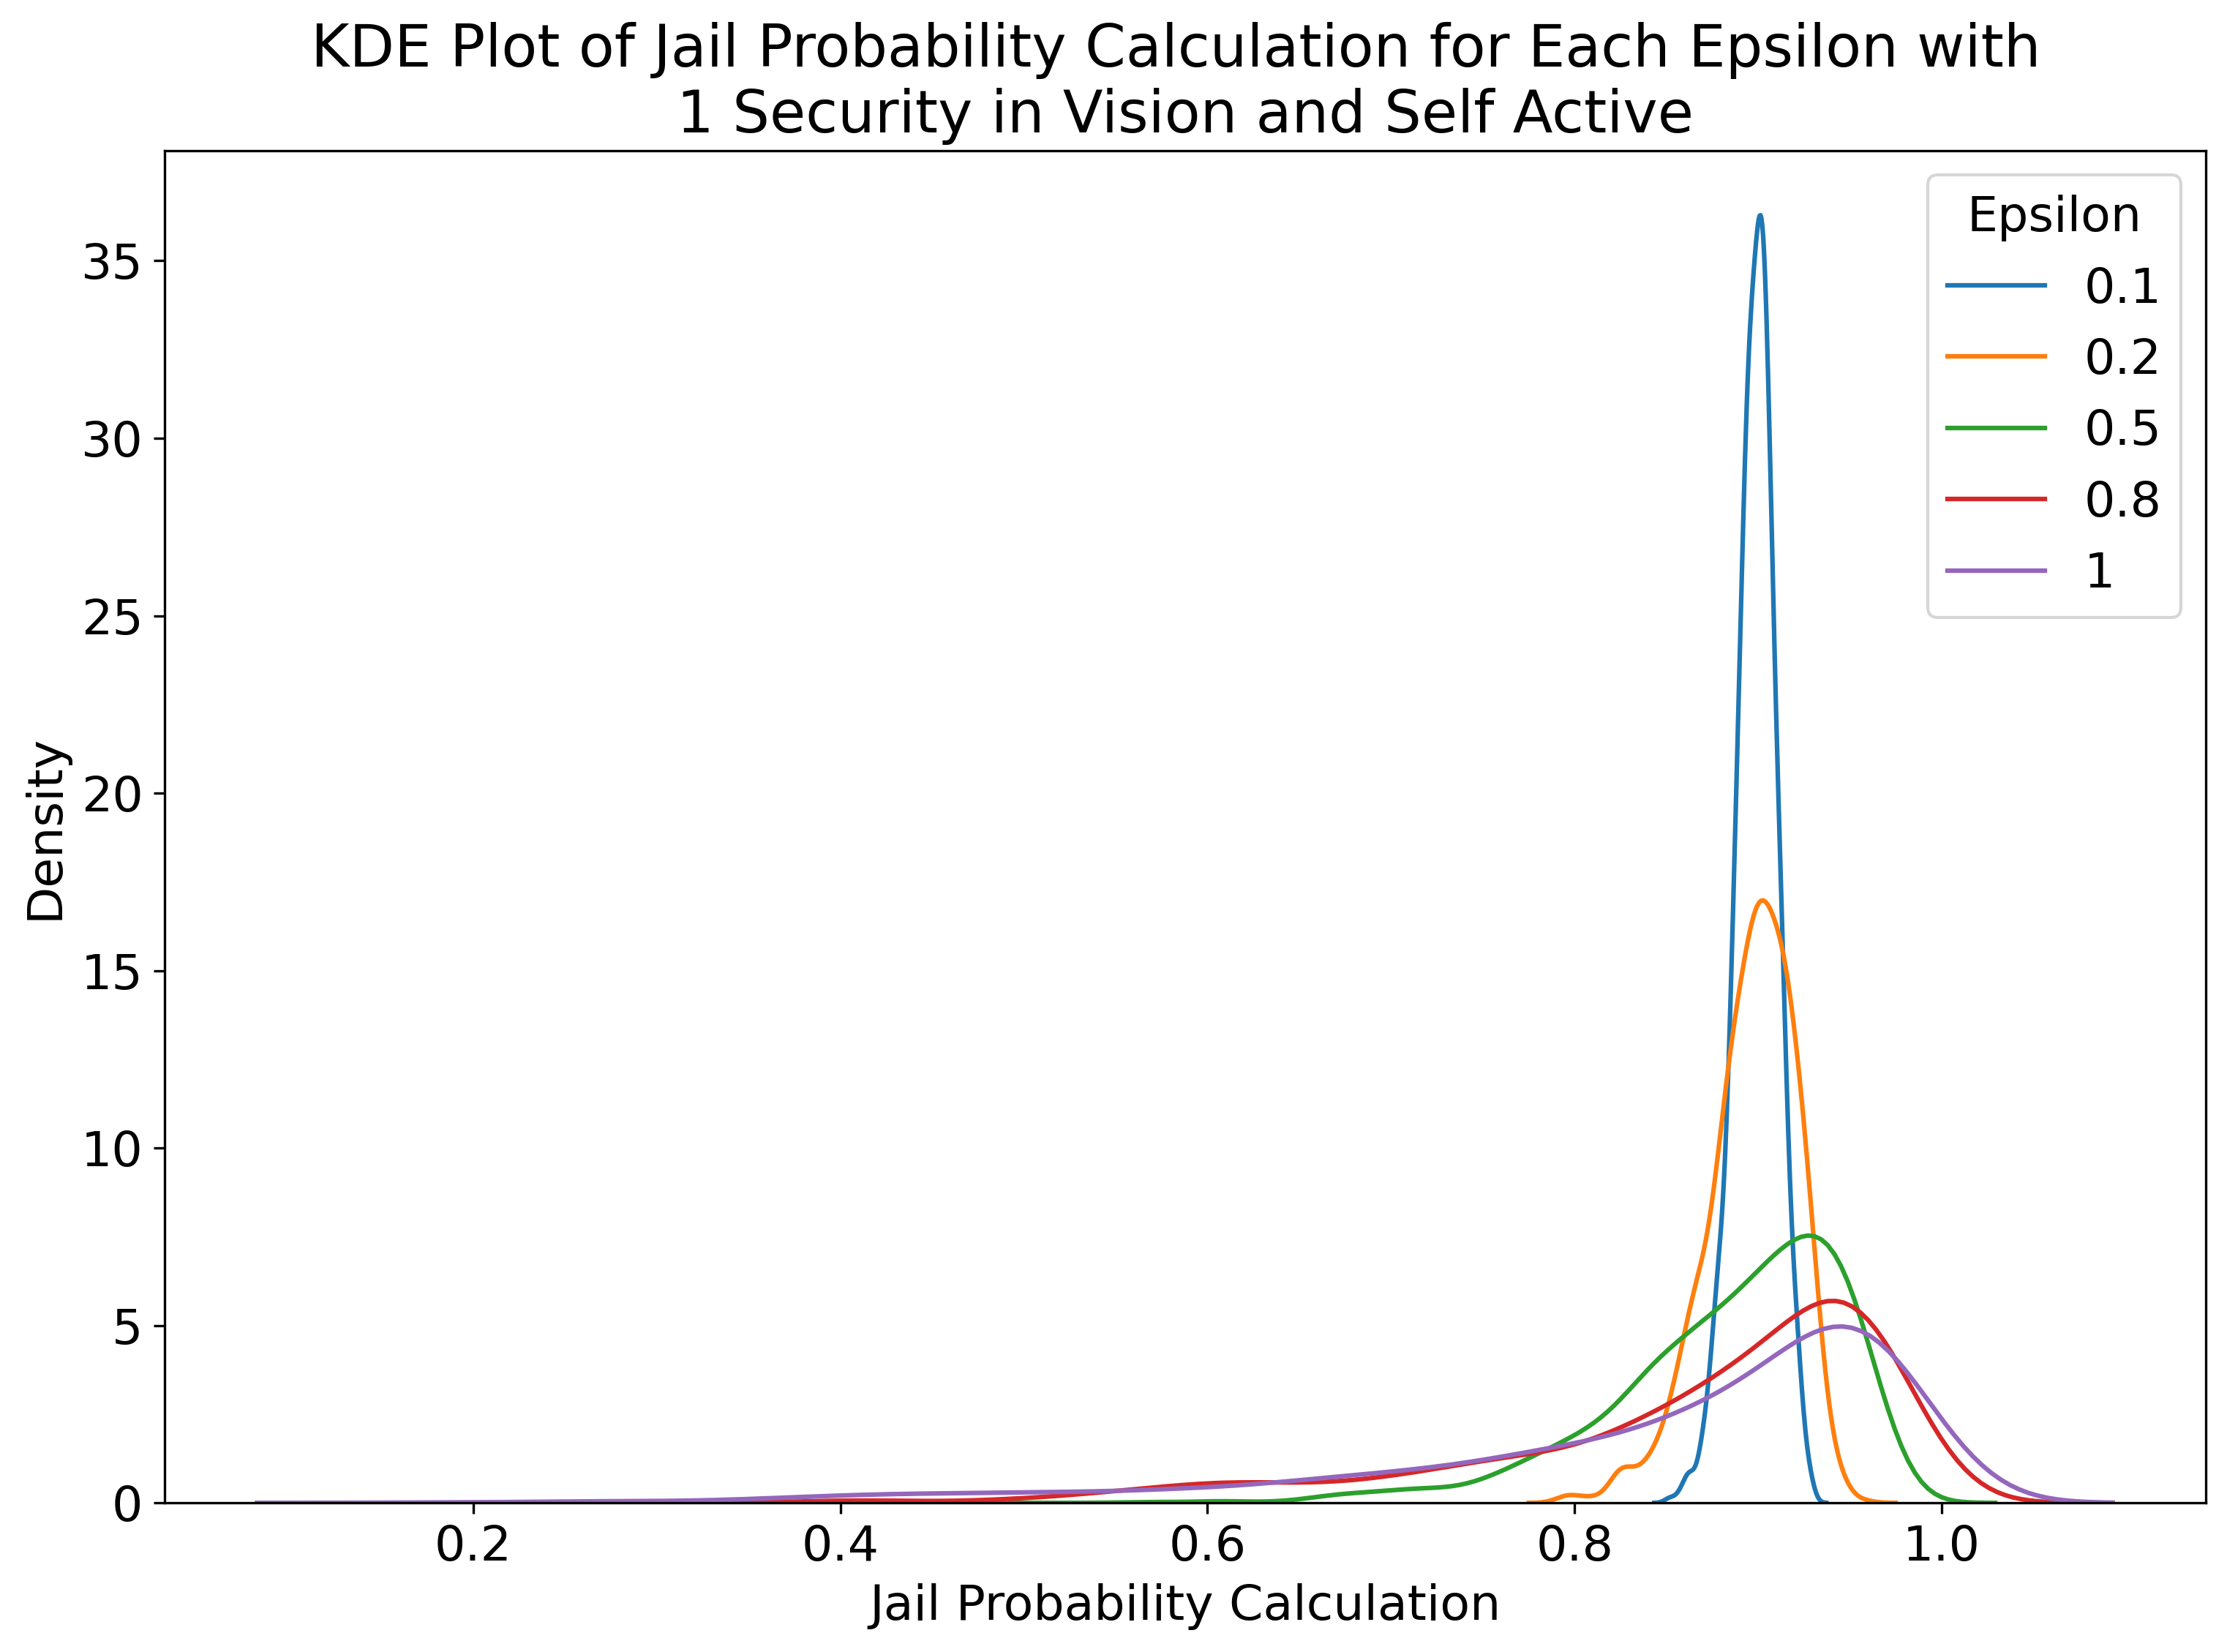

In [21]:
# Set the figure size and DPI
plt.figure(figsize=(12, 8), dpi=300)

# kde plot of jail probability calculation for each epsilon with 1 security in vision
for epsilon in epsilons:
    sns.kdeplot(jail_probability(df[epsilon]), label=epsilon)

plt.title('KDE Plot of Jail Probability Calculation for Each Epsilon with \n1 Security in Vision and Self Active')
plt.xlabel('Jail Probability Calculation')
plt.legend(title='Epsilon')

# Save the high-resolution plot to a file
plt.savefig('kde_plot_jail_probability_high_resolution.png', dpi=300)


In [22]:
def jail_cost_expectation(epsilon):
    return (30 * sigmoid(epsilon))

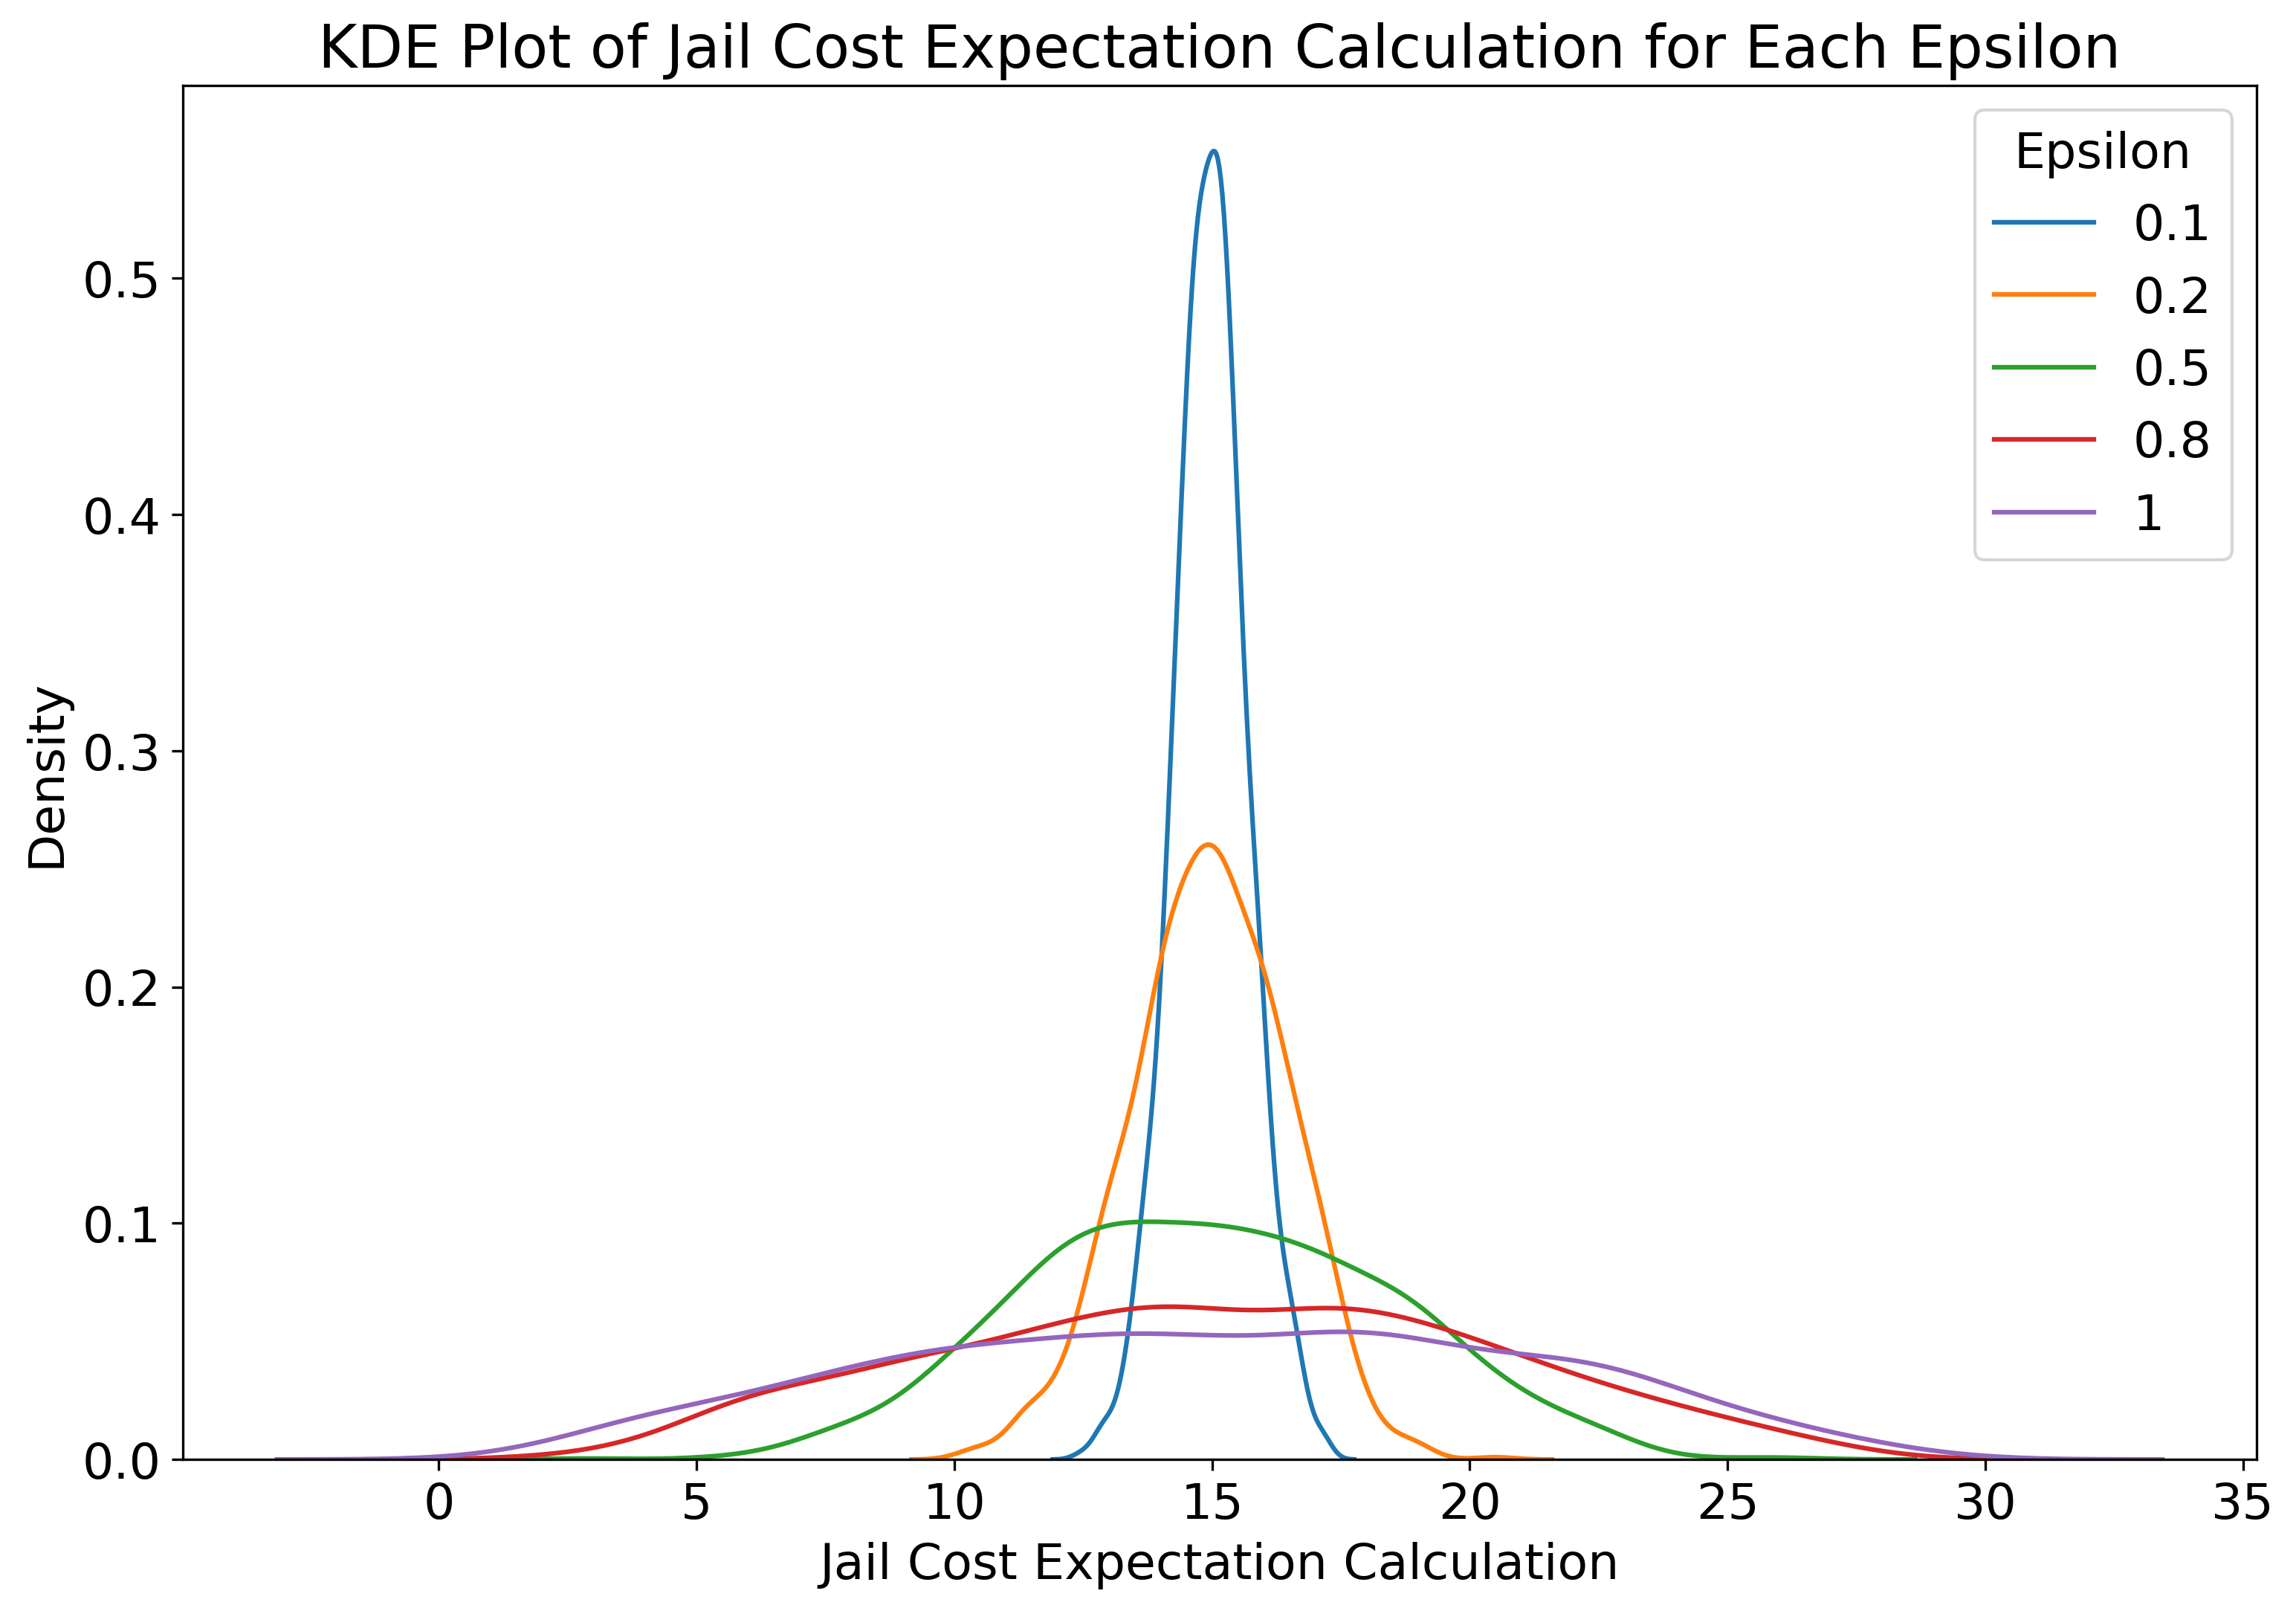

In [23]:
# Set the figure size and DPI
plt.figure(figsize=(12, 8), dpi=300)

# kde plot of jail cost expectation calculation for each epsilon
for epsilon in epsilons:
    sns.kdeplot(jail_cost_expectation(df[epsilon]), label=epsilon)

plt.title('KDE Plot of Jail Cost Expectation Calculation for Each Epsilon')
plt.xlabel('Jail Cost Expectation Calculation')
plt.legend(title='Epsilon')

# Save the high-resolution plot to a file
plt.savefig('kde_plot_jail_cost_expectation_high_resolution.png', dpi=300)

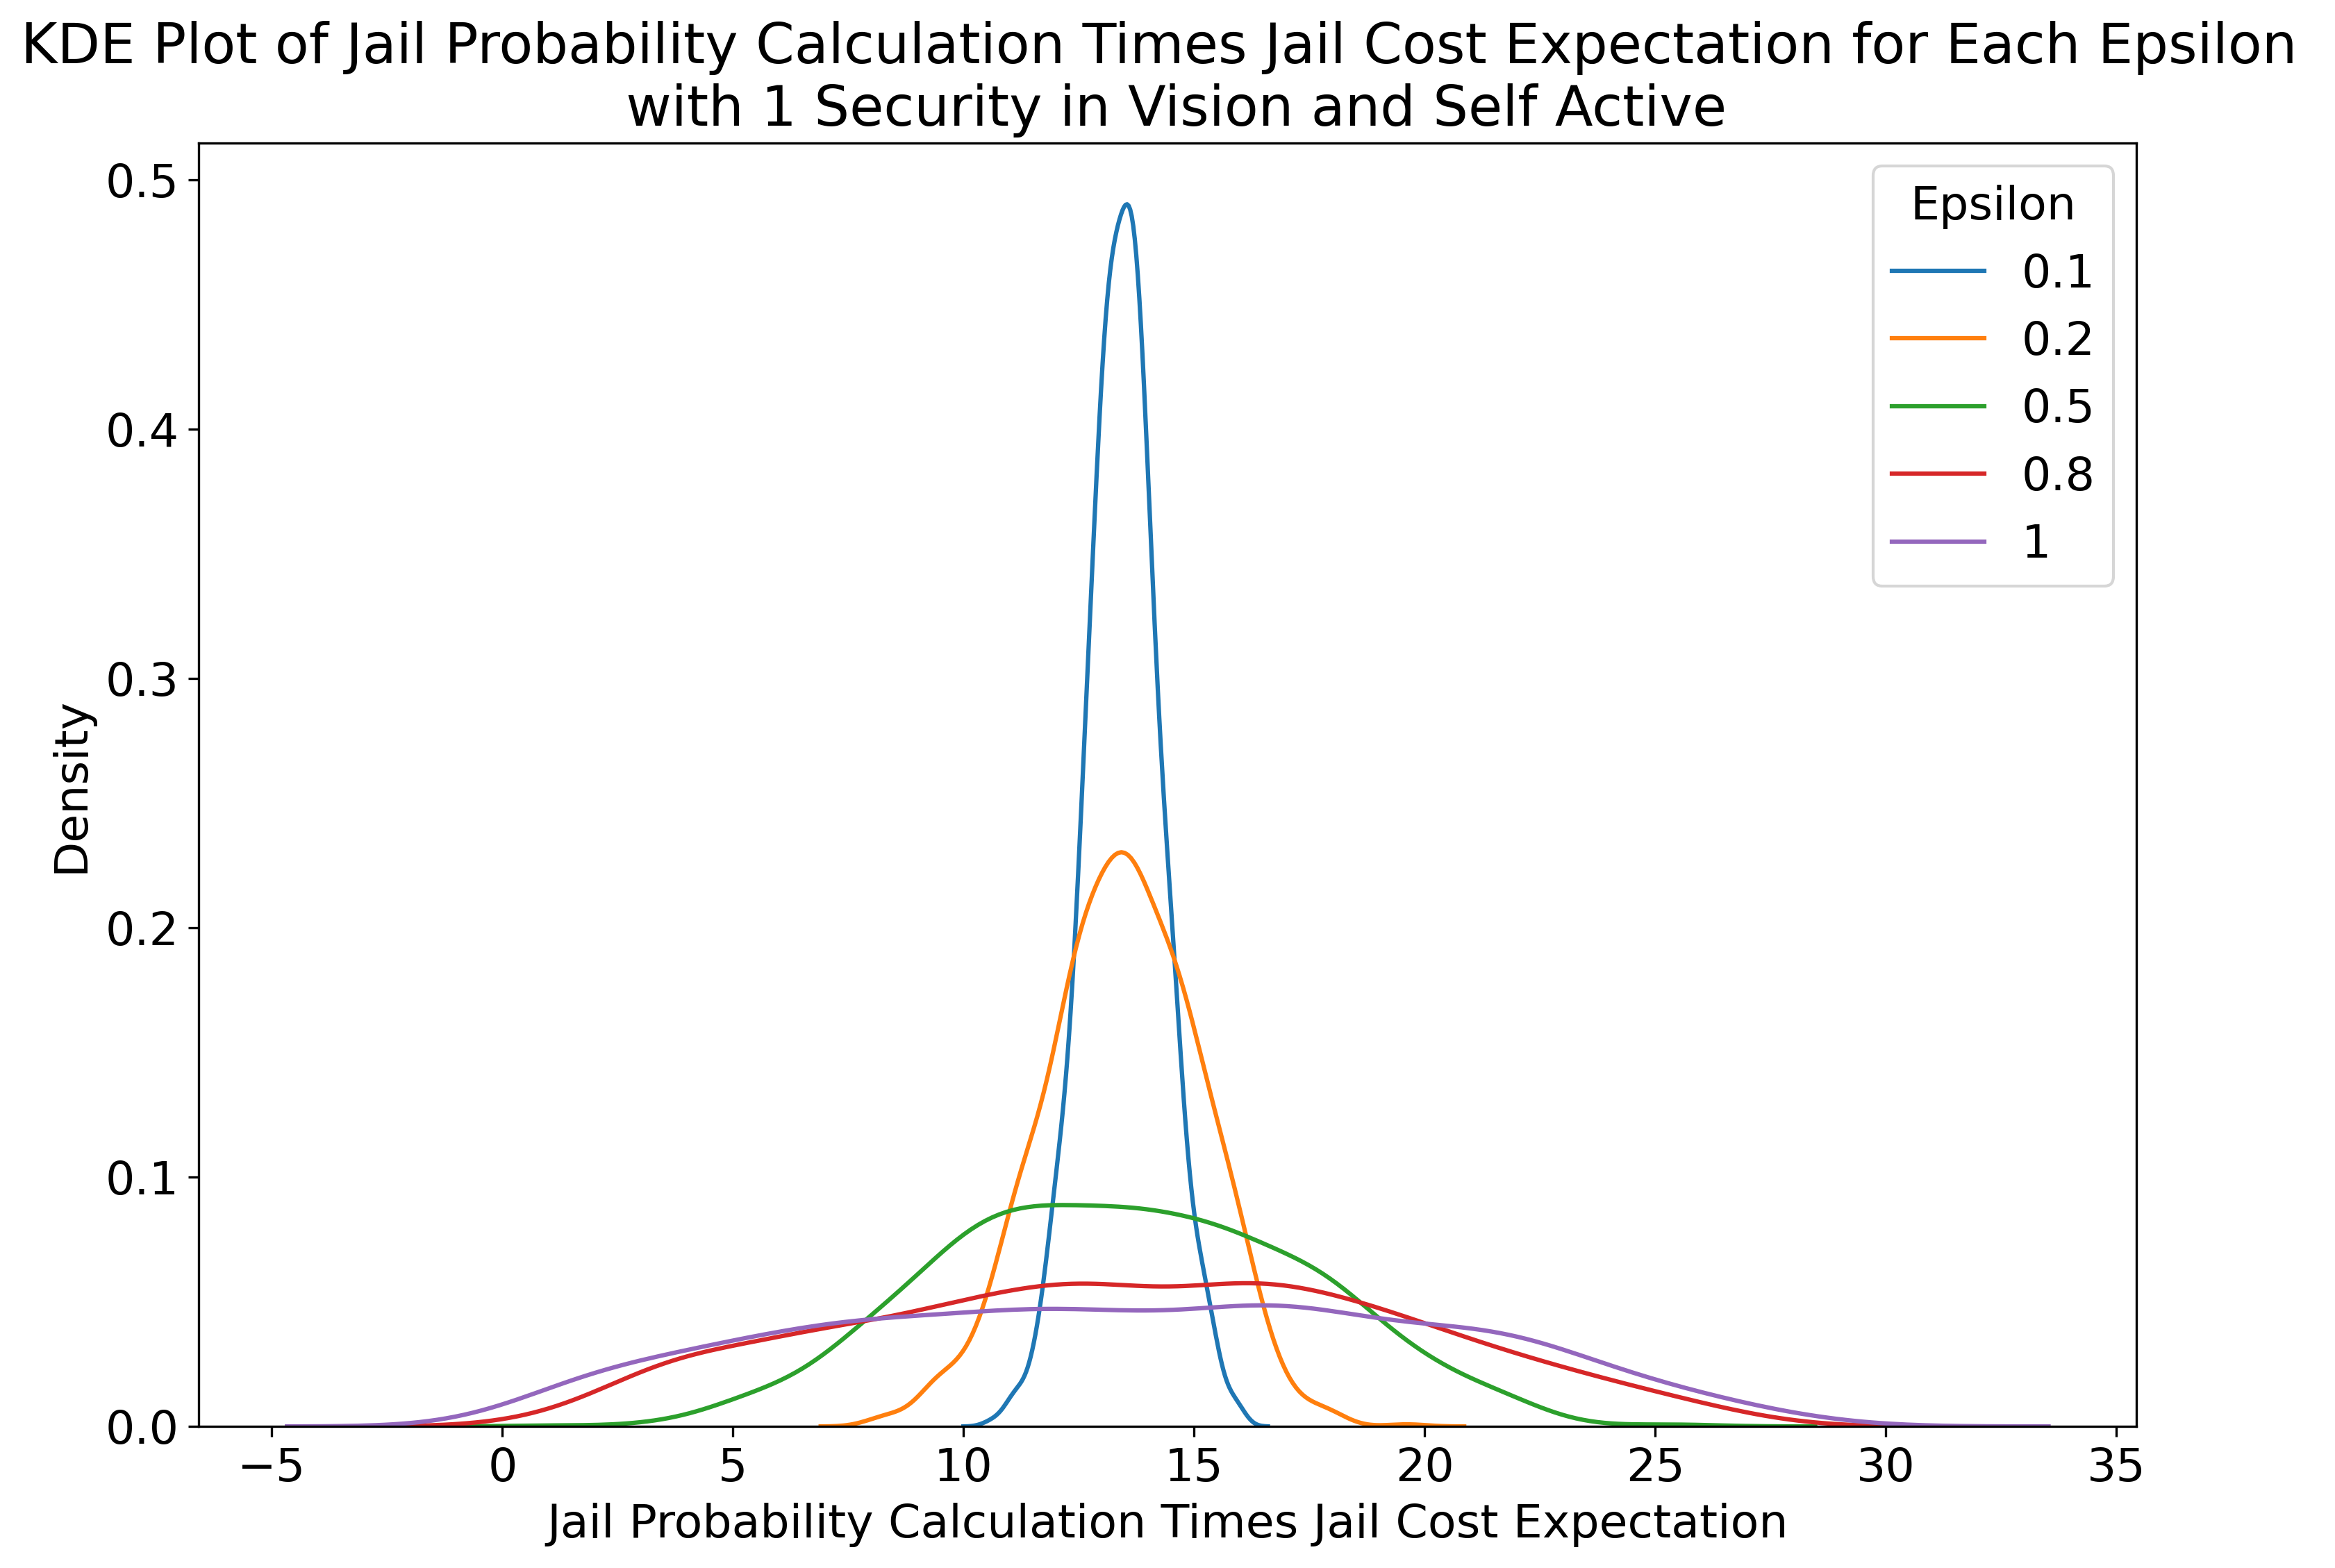

In [24]:
# Set the figure size and DPI
plt.figure(figsize=(12, 8), dpi=300)

# kde plot of jail probability calculation times jail cost expectation for each epsilon
for epsilon in epsilons:
    sns.kdeplot(jail_probability(df[epsilon]) * jail_cost_expectation(df[epsilon]), label=epsilon)

plt.title('KDE Plot of Jail Probability Calculation Times Jail Cost Expectation for Each Epsilon \n with 1 Security in Vision and Self Active')
plt.xlabel('Jail Probability Calculation Times Jail Cost Expectation')
plt.legend(title='Epsilon')

# Save the high-resolution plot to a file
plt.savefig('kde_plot_jail_probability_times_jail_cost_expectation_high_resolution.png', dpi=300)

In [25]:
def perception_of_regime_support(epsilon, actives=2):
    return ((actives/157) * (np.log(actives)/(epsilon**2 + 0.05)))

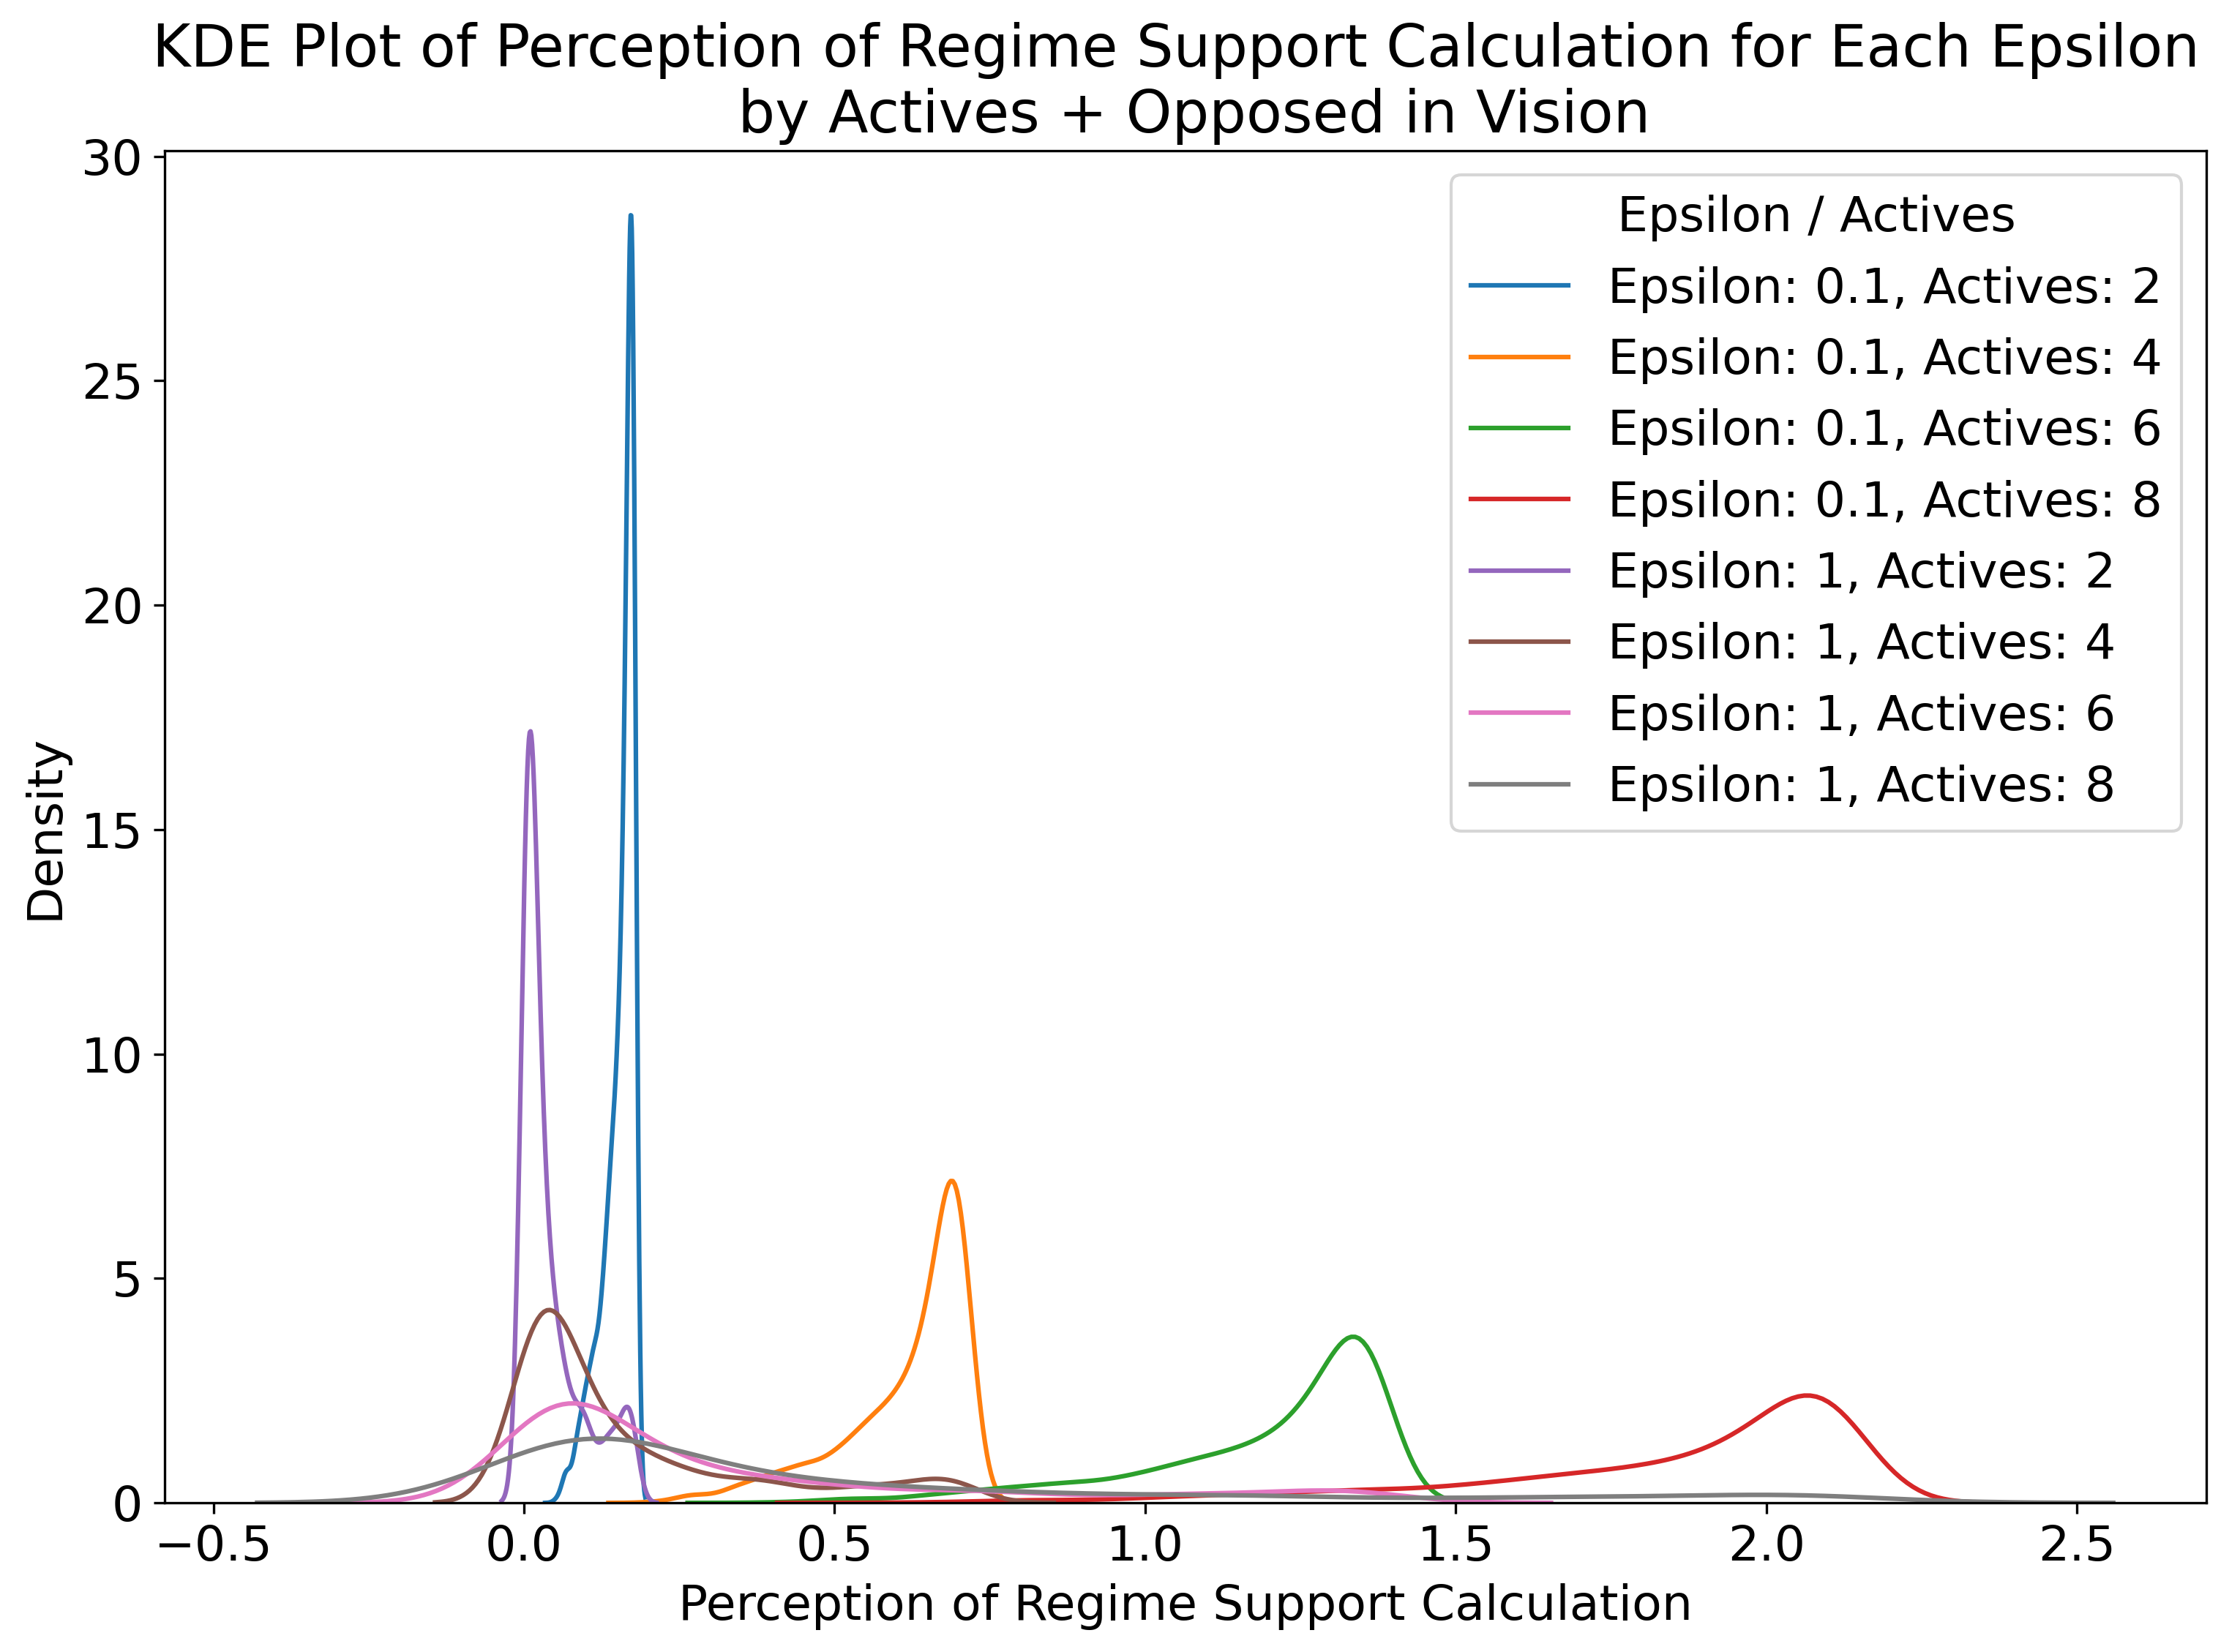

In [26]:
# Set the figure size and DPI
plt.figure(figsize=(12, 8), dpi=300)

# kde plot of perception of regime support calculation for each epsilon with only one active in vision
for index in [0, 4]:
    epsilon = epsilons[index]
    for actives in range(2, 9, 2):
        sns.kdeplot(perception_of_regime_support(df[epsilon], actives), label=f"Epsilon: {epsilon}, Actives: {actives}")

plt.title('KDE Plot of Perception of Regime Support Calculation for Each Epsilon \n by Actives + Opposed in Vision')
plt.xlabel('Perception of Regime Support Calculation')
plt.legend(title='Epsilon / Actives')

# Save the high-resolution plot to a file
plt.savefig('kde_plot_perception_of_regime_support_high_resolution.png', dpi=300)

# Show the plot
plt.show()


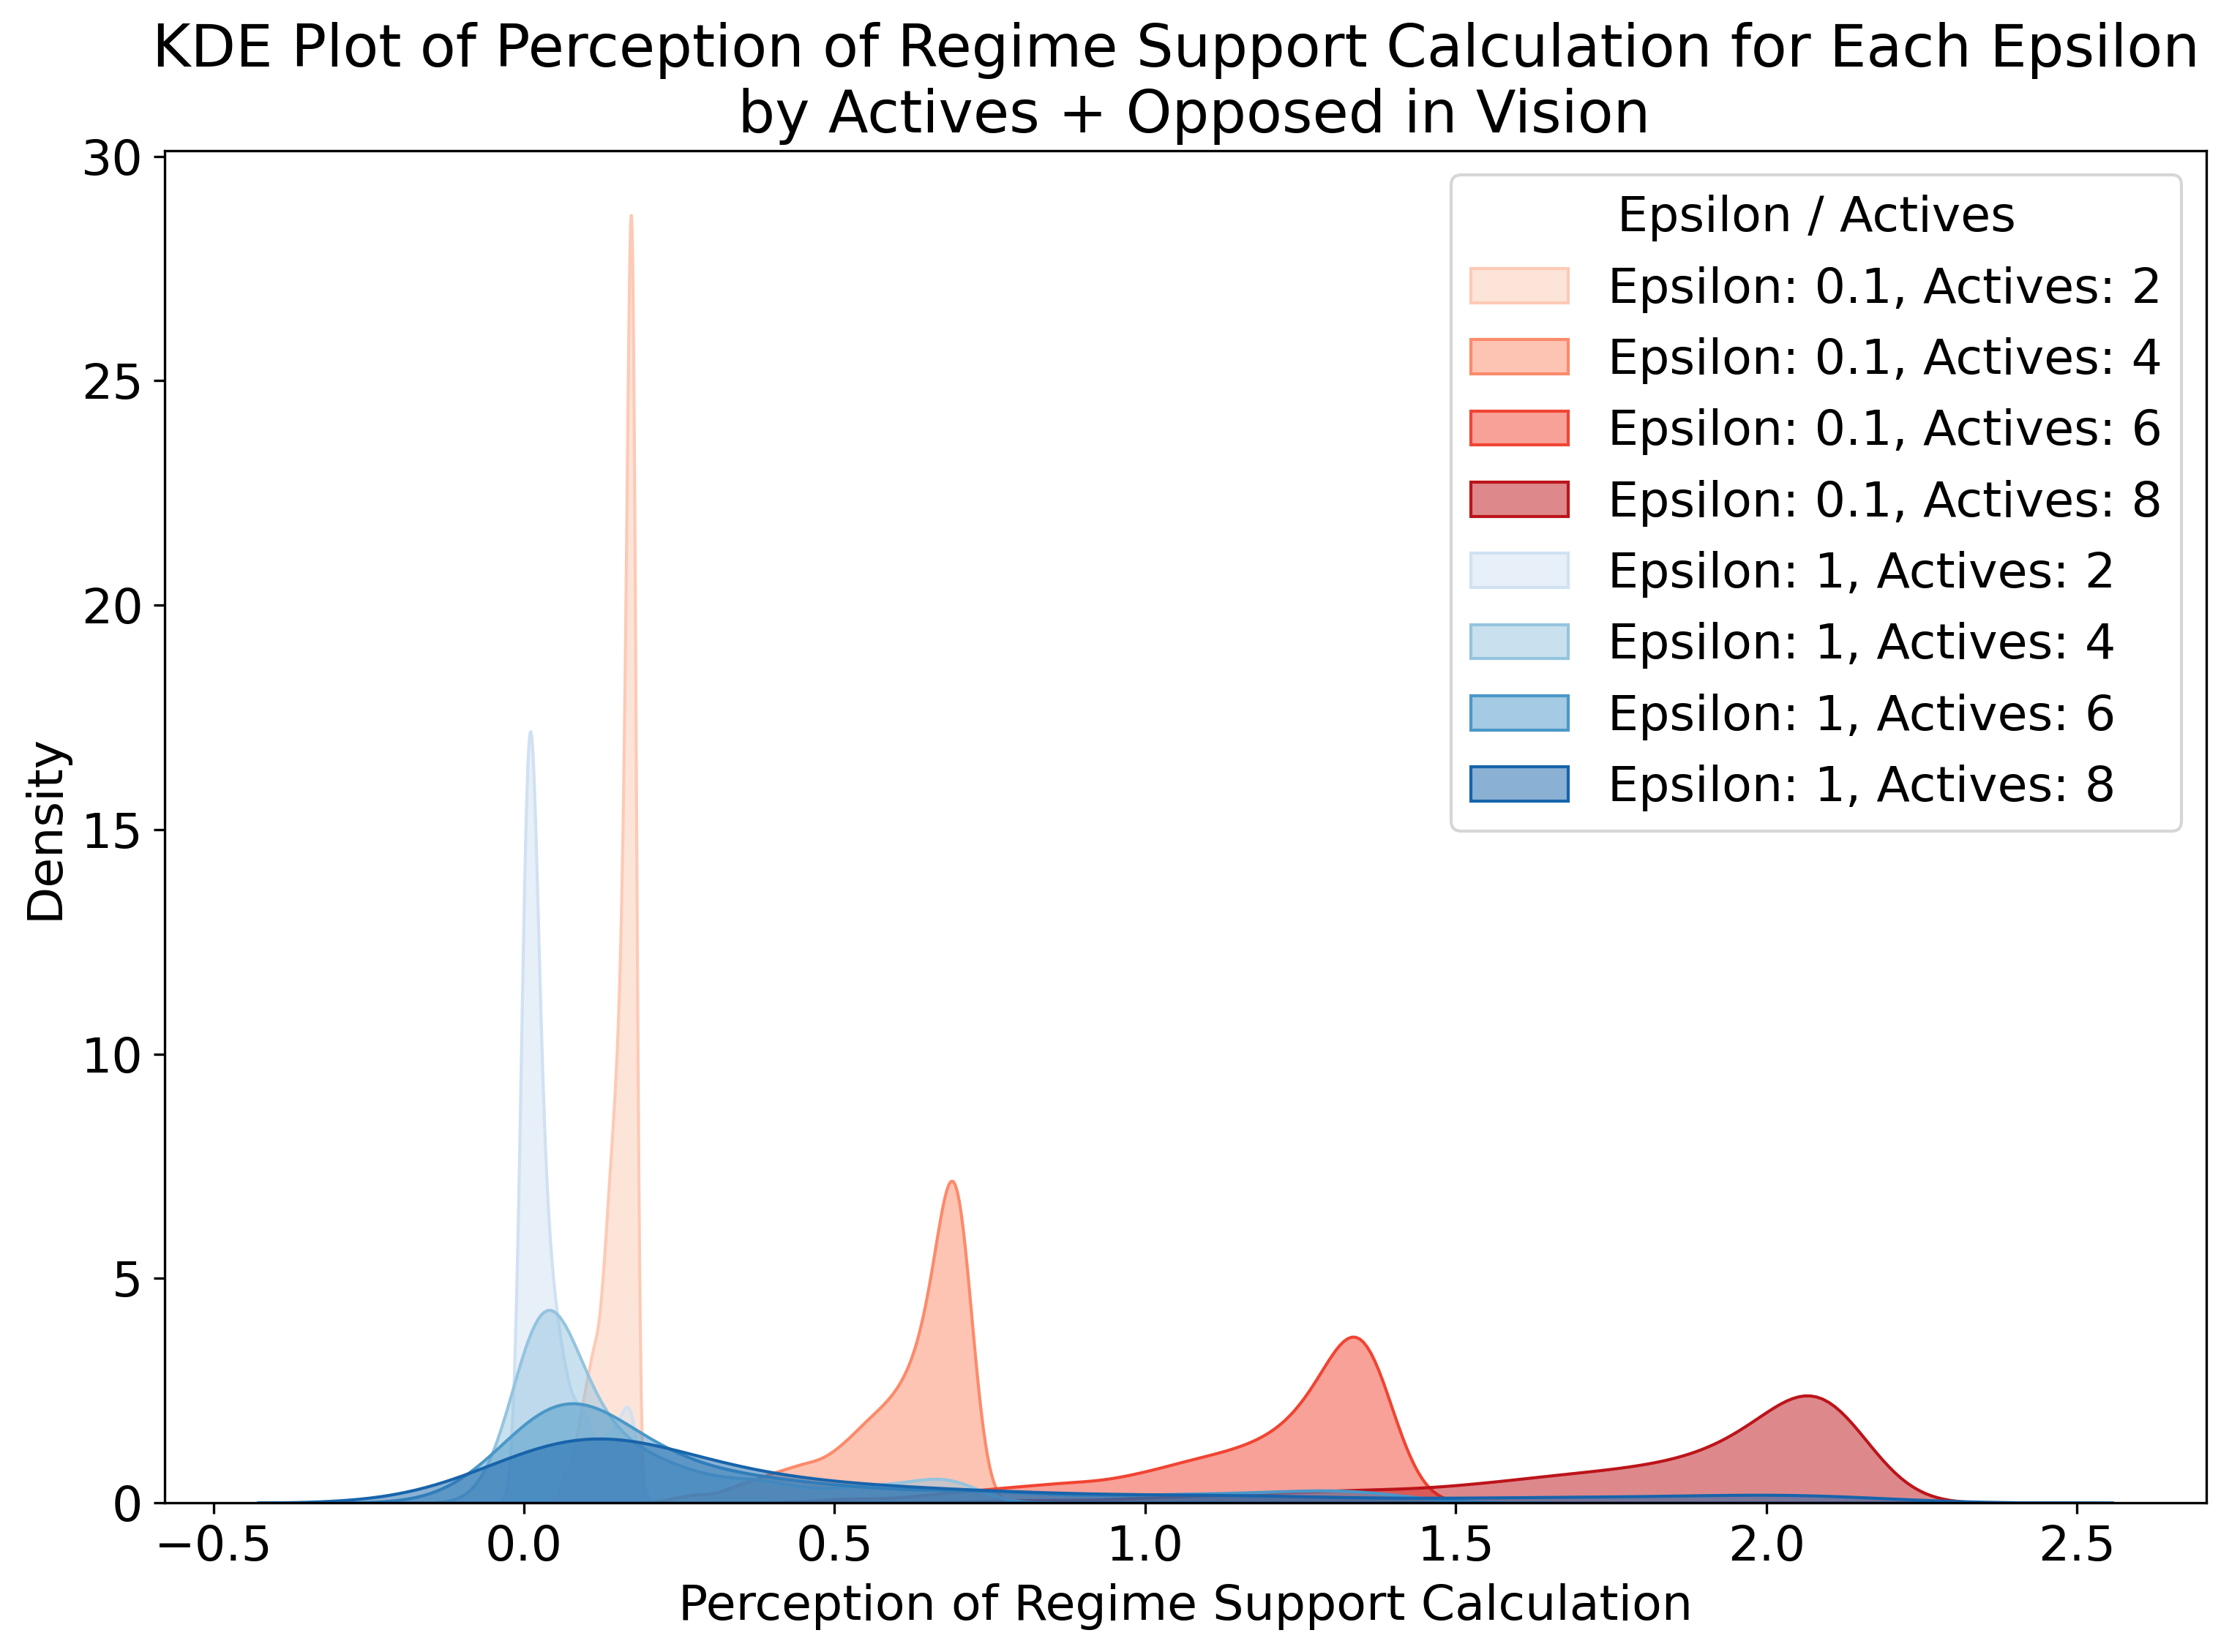

In [27]:
# Set the figure size and DPI
plt.figure(figsize=(12, 8), dpi=300)

# kde plot of perception of regime support calculation for each epsilon with only one active in vision
for index in [0, 4]:
    epsilon = epsilons[index]
    if epsilon == 0.1:
        colors = sns.color_palette("Reds", n_colors=len(range(2, 9, 2)))
    else:
        colors = sns.color_palette("Blues", n_colors=len(range(2, 9, 2)))

    for idx, actives in enumerate(range(2, 9, 2)):
        sns.kdeplot(perception_of_regime_support(df[epsilon], actives),
                    label=f"Epsilon: {epsilon}, Actives: {actives}",
                    color=colors[idx], fill=True, alpha=0.5)
        
plt.title('KDE Plot of Perception of Regime Support Calculation for Each Epsilon \n by Actives + Opposed in Vision')
plt.xlabel('Perception of Regime Support Calculation')
plt.legend(title='Epsilon / Actives')

# Save the high-resolution plot to a file
plt.savefig('kde_plot_perception_of_regime_support_high_resolution.png', dpi=300)

# Show the plot
plt.show()


In [37]:
def perception_of_regime_support_e(epsilon, actives=2):
    return ((actives/157) * np.exp(np.log(actives)/(epsilon**2 + 1)))

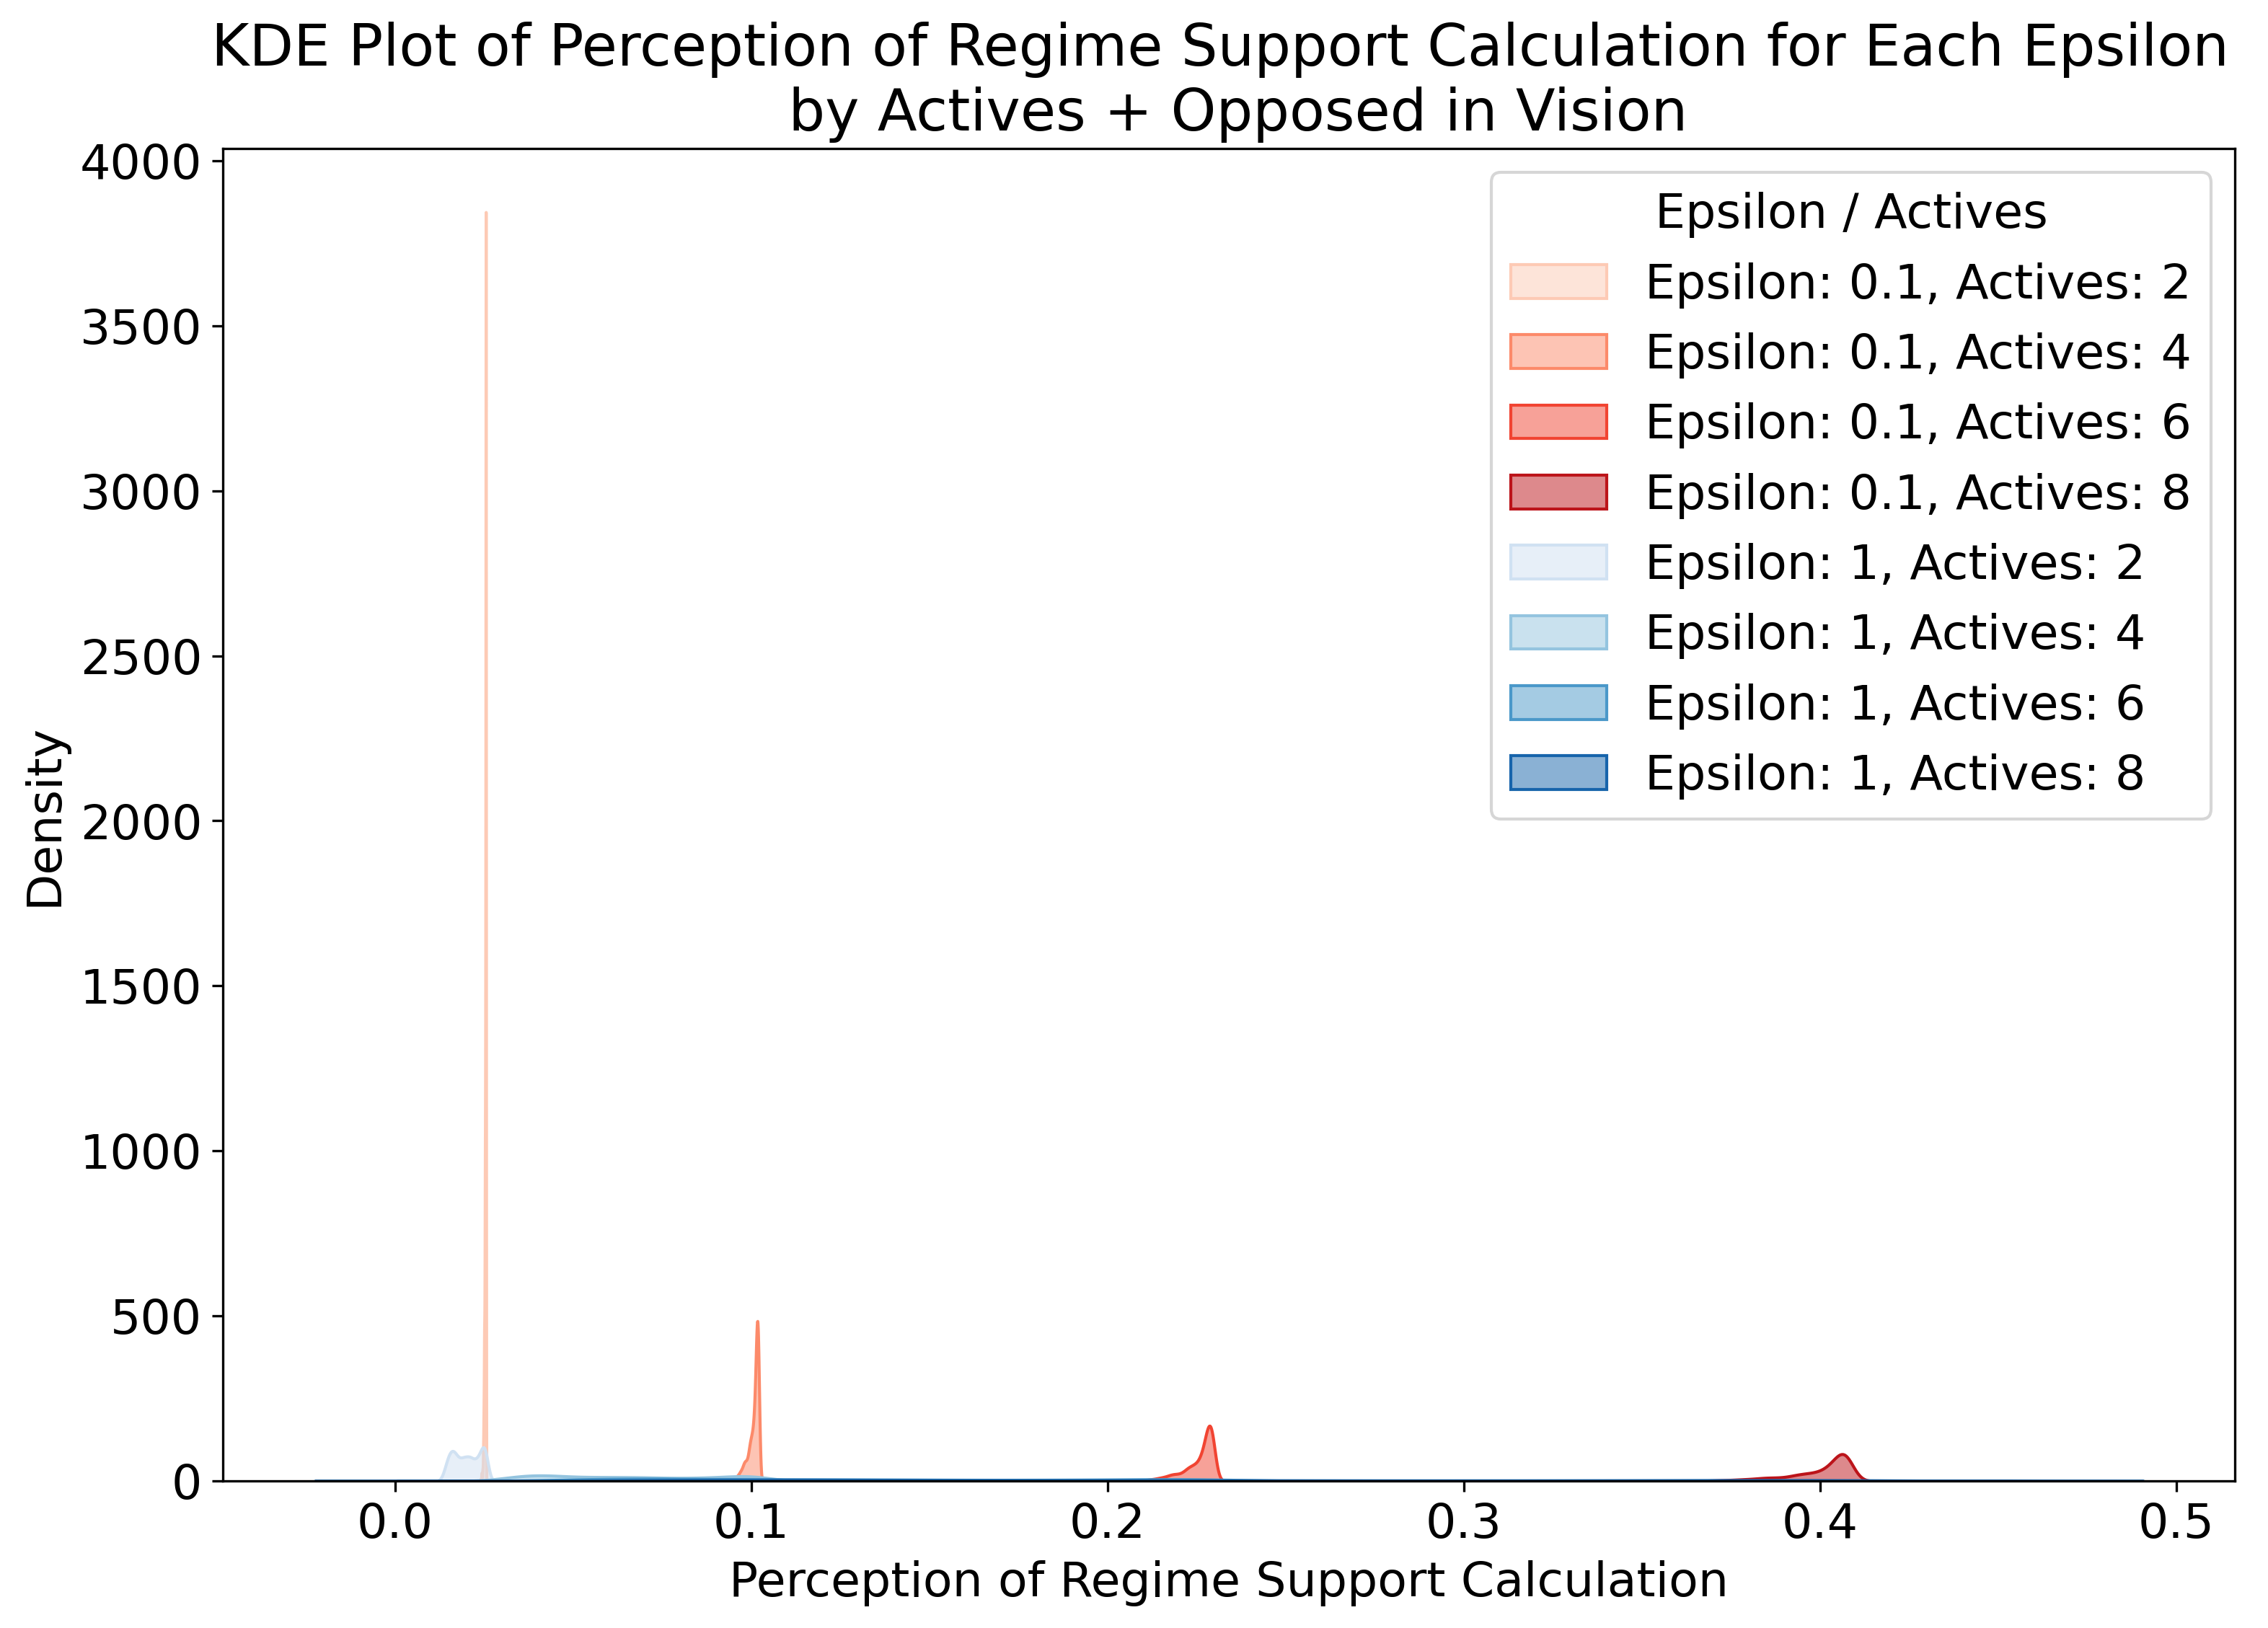

In [38]:
# Set the figure size and DPI
plt.figure(figsize=(12, 8), dpi=300)

# kde plot of perception of regime support calculation for each epsilon with only one active in vision
for index in [0, 4]:
    epsilon = epsilons[index]
    if epsilon == 0.1:
        colors = sns.color_palette("Reds", n_colors=len(range(2, 9, 2)))
    else:
        colors = sns.color_palette("Blues", n_colors=len(range(2, 9, 2)))

    for idx, actives in enumerate(range(2, 9, 2)):
        sns.kdeplot(perception_of_regime_support_e(df[epsilon], actives),
                    label=f"Epsilon: {epsilon}, Actives: {actives}",
                    color=colors[idx], fill=True, alpha=0.5)
        
plt.title('KDE Plot of Perception of Regime Support Calculation for Each Epsilon \n by Actives + Opposed in Vision')
plt.xlabel('Perception of Regime Support Calculation')
plt.legend(title='Epsilon / Actives')

# Save the high-resolution plot to a file
plt.savefig('kde_plot_perception_of_regime_support_high_resolution.png', dpi=300)

# Show the plot
plt.show()
